<a href="https://colab.research.google.com/github/NoahHeerdink/ReCell/blob/main/Heerdink_ReCell.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Supervised Learning - Foundations Project: ReCell**

## **Problem Statement**

### **Business Context**

Buying and selling used phones and tablets used to be something that happened on a handful of online marketplace sites. But the used and refurbished device market has grown considerably over the past decade, and a new IDC (International Data Corporation) forecast predicts that the used phone market would be worth \\$52.7bn by 2023 with a compound annual growth rate (CAGR) of 13.6% from 2018 to 2023. This growth can be attributed to an uptick in demand for used phones and tablets that offer considerable savings compared with new models.

Refurbished and used devices continue to provide cost-effective alternatives to both consumers and businesses that are looking to save money when purchasing one. There are plenty of other benefits associated with the used device market. Used and refurbished devices can be sold with warranties and can also be insured with proof of purchase. Third-party vendors/platforms, such as Verizon, Amazon, etc., provide attractive offers to customers for refurbished devices. Maximizing the longevity of devices through second-hand trade also reduces their environmental impact and helps in recycling and reducing waste. The impact of the COVID-19 outbreak may further boost this segment as consumers cut back on discretionary spending and buy phones and tablets only for immediate needs.


### **Objective**

The rising potential of this comparatively under-the-radar market fuels the need for an ML-based solution to develop a dynamic pricing strategy for used and refurbished devices. ReCell, a startup aiming to tap the potential in this market, has hired you as a data scientist. They want you to analyze the data provided and build a linear regression model to predict the price of a used phone/tablet and identify factors that significantly influence it.


### **Data Description**

The data contains the different attributes of used/refurbished phones and tablets. The data was collected in the year 2021. The detailed data dictionary is given below.


- brand_name: Name of manufacturing brand
- os: OS on which the device runs
- screen_size: Size of the screen in cm
- 4g: Whether 4G is available or not
- 5g: Whether 5G is available or not
- main_camera_mp: Resolution of the rear camera in megapixels
- selfie_camera_mp: Resolution of the front camera in megapixels
- int_memory: Amount of internal memory (ROM) in GB
- ram: Amount of RAM in GB
- battery: Energy capacity of the device battery in mAh
- weight: Weight of the device in grams
- release_year: Year when the device model was released
- days_used: Number of days the used/refurbished device has been used
- normalized_new_price: Normalized price of a new device of the same model in euros
- normalized_used_price: Normalized price of the used/refurbished device in euros

## Importing necessary libraries

In [1]:
# this will help in making the Python code more structured automatically (good coding practice)
#%load_ext nb_black

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
from sklearn.linear_model import LinearRegression

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# to build linear regression_model using statsmodels
import statsmodels.api as sm

# to compute VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Loading the dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

# loading dataset
data = pd.read_csv('/content/drive/MyDrive/Great Learning/3.0 Supervised Learning - Foundations/used_device_data.csv')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


## Data Overview

The initial steps to get an overview of the dataset is to:
*   observe the first few rows of the dataset, to check whether the dataset has been loaded properly or not
*   get information about the number of rows and columns in the dataset
* find out the data types of the columns to ensure that data is stored in the preferred format and the value of each property as is expected
* check the statistical summary of the dataset to get an overview of the numerical columns of the data



In [3]:
# displaying the first few rows of the dataset
data.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837


In [4]:
# displaying the last five rows of the dataset
data.tail()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
3449,Asus,Android,15.34,yes,no,NaN,8.0,64.0,6.0,5000.0,190.0,2019,232,4.492337,6.483872
3450,Asus,Android,15.24,yes,no,13.0,8.0,128.0,8.0,4000.0,200.0,2018,541,5.037732,6.251538
3451,Alcatel,Android,15.80,yes,no,13.0,5.0,32.0,3.0,4000.0,165.0,2020,201,4.357350,4.528829
3452,Alcatel,Android,15.80,yes,no,13.0,5.0,32.0,2.0,4000.0,160.0,2020,149,4.349762,4.624188
3453,Alcatel,Android,12.83,yes,no,13.0,5.0,16.0,2.0,4000.0,168.0,2020,176,4.132122,4.279994


**Observations:**
* a high percentage of devices seem to be Androids.
* There are devices available from as late as 2020.

In [5]:
data.shape

(3454, 15)

**Observations:** there are 3454 rows and 15 columns in the dataset.

In [6]:
# checking the data types of the coluns for the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3275 non-null   float64
 6   selfie_camera_mp       3452 non-null   float64
 7   int_memory             3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

**Observations:**
* There are 11 numerical (float and integer) types and 4 object types in the dataset.
* The target variable is the normalized price of a used device and is a float type.

In [7]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
brand_name,3454,34,Others,502,NaN,NaN,NaN,NaN,NaN,NaN,NaN
os,3454,4,Android,3214,NaN,NaN,NaN,NaN,NaN,NaN,NaN
screen_size,3454.0,NaN,NaN,NaN,13.713115,3.80528,5.08,12.7,12.83,15.34,30.71
4g,3454,2,yes,2335,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5g,3454,2,no,3302,NaN,NaN,NaN,NaN,NaN,NaN,NaN
main_camera_mp,3275.0,NaN,NaN,NaN,9.460208,4.815461,0.08,5.0,8.0,13.0,48.0
selfie_camera_mp,3452.0,NaN,NaN,NaN,6.554229,6.970372,0.0,2.0,5.0,8.0,32.0
int_memory,3450.0,NaN,NaN,NaN,54.573099,84.972371,0.01,16.0,32.0,64.0,1024.0
ram,3450.0,NaN,NaN,NaN,4.036122,1.365105,0.02,4.0,4.0,4.0,12.0
battery,3448.0,NaN,NaN,NaN,3133.402697,1299.682844,500.0,2100.0,3000.0,4000.0,9720.0


**Observations:**
* There are 33 brands in the data and a category Others too.
* Android is the most common OS for the used devices.
* The weight ranges from 69g to 855g. This seems correct as the data contains both phones and tablets.
* There are a few unusually low values for the internal memory and RAM of used devices, but those are likely due to the presence of feature phones in the data.
* The average value of the normalized price of a used device is approx. 4.4 euros.


In [8]:
# checking for duplicates
data.duplicated().sum()

0

In [9]:
# checking for missing values
data.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

**Observations:**
* There are no duplicate values.
* There are missing values in 6 columns. I will determine if they need to be dealt with after EDA.

In [10]:
# creating a copy of the data so that the original data remains unchanged
df = data.copy()

## **Exploratory Data Analysis (EDA)**

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What does the distribution of normalized used device prices look like?
2. What percentage of the used device market is dominated by Android devices?
3. The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?
4. A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?
5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?
6. A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?
7. Which attributes are highly correlated with the normalized price of a used device?

## **Univariate Analysis**

In [11]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [12]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

**brand_name**

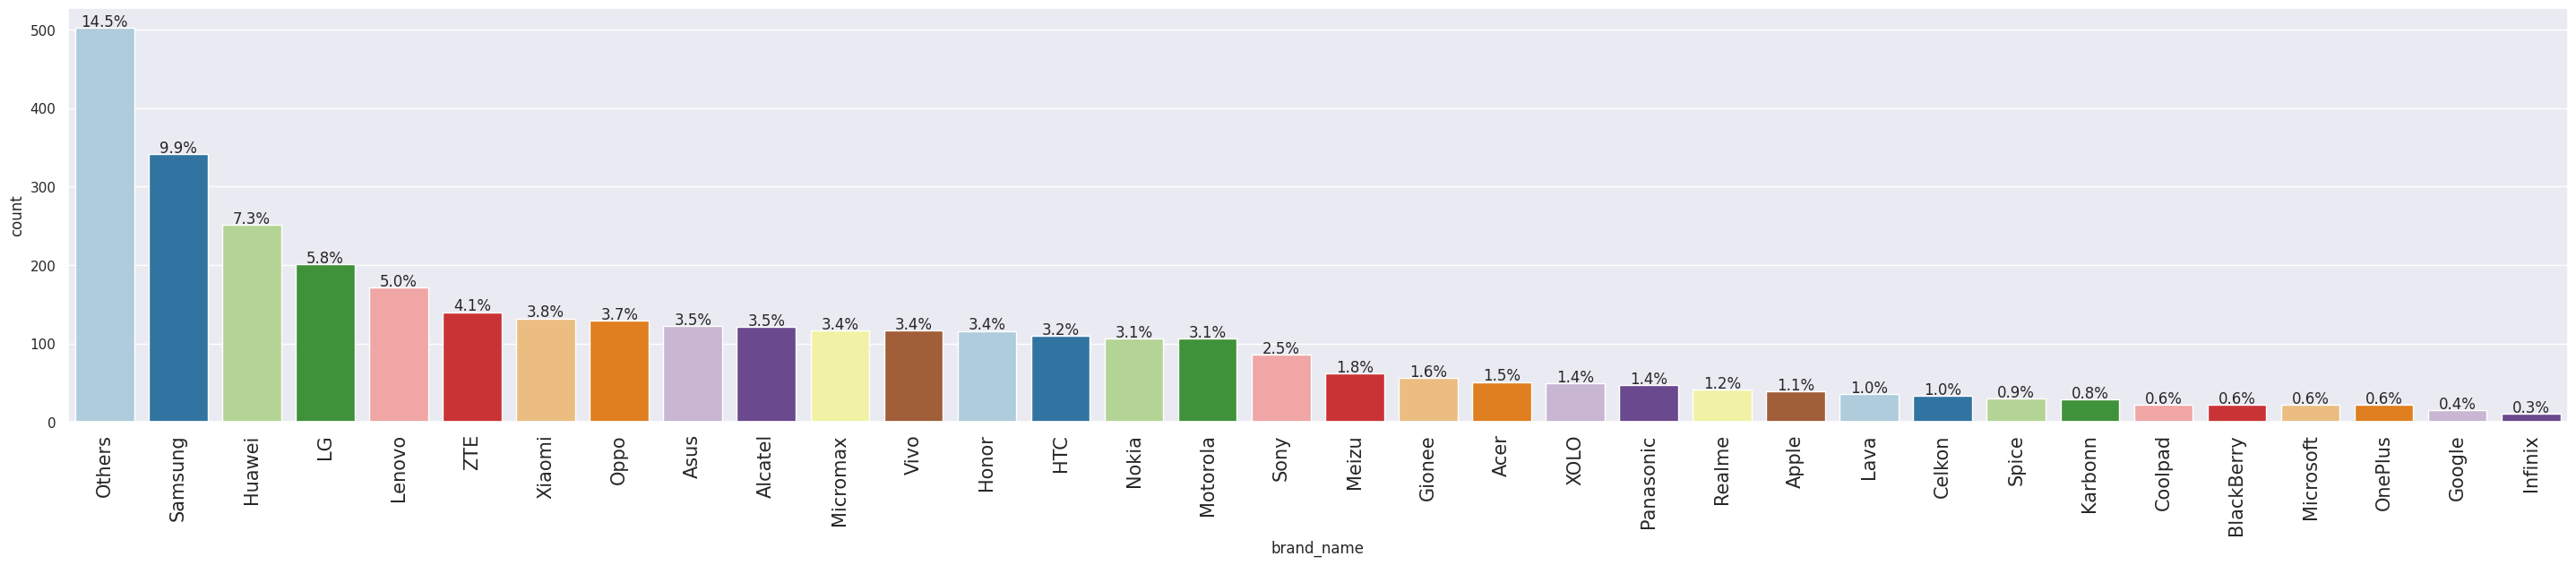

In [13]:
labeled_barplot(df, 'brand_name', perc=True)

**Observations:**
* 14.5% of devices are in the category "others."
* 9.9% of devices are Samsung, followed by 7.3% are Huawei, and 5.8% are LG.

**normalized_used_price**

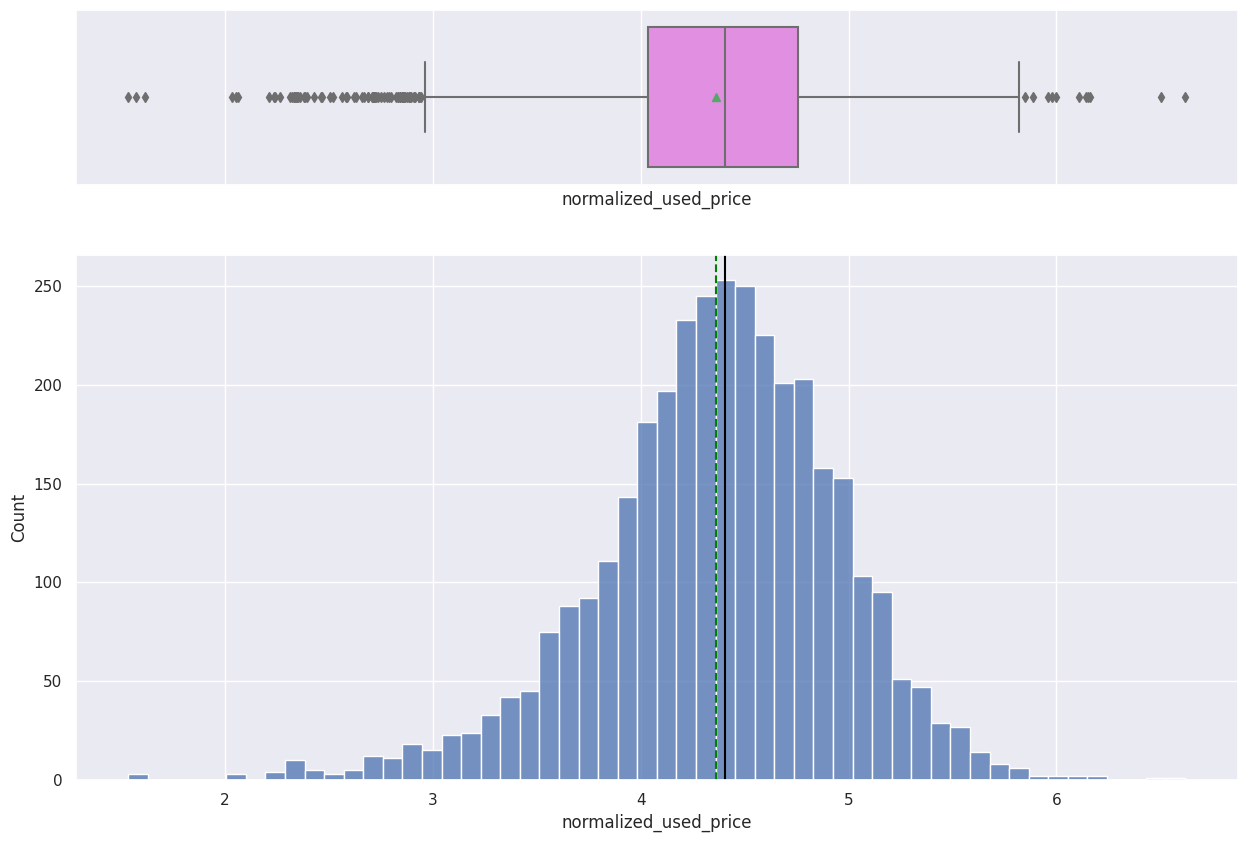

In [14]:
histogram_boxplot(df, "normalized_used_price")

**Observations:** the normalized used device prices are almost normally distributed.

**normalized_new_price**

What does the distribution of normalized used device prices look like?

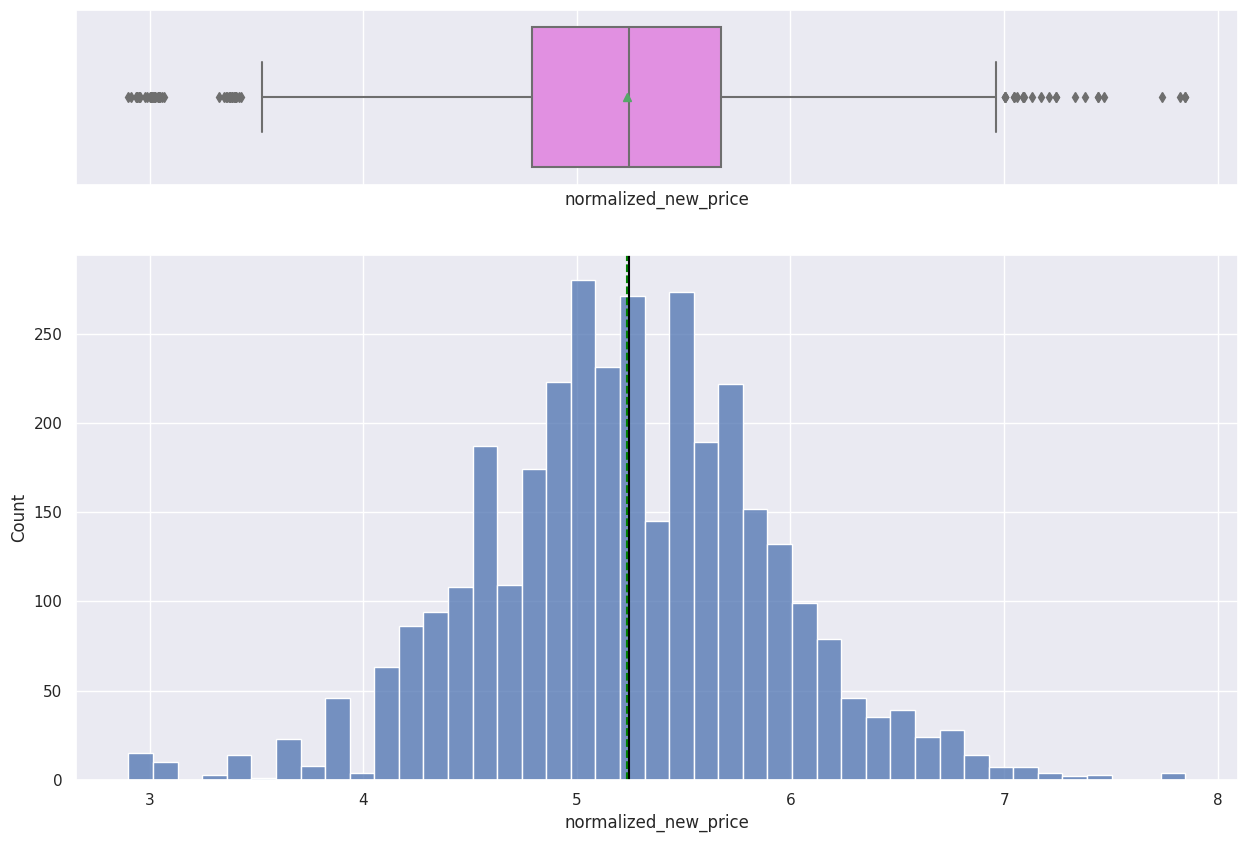

In [15]:
histogram_boxplot(df, "normalized_new_price")

**Observations:** the normalized prices of new device models are almost normally distributed.

**screen_size**

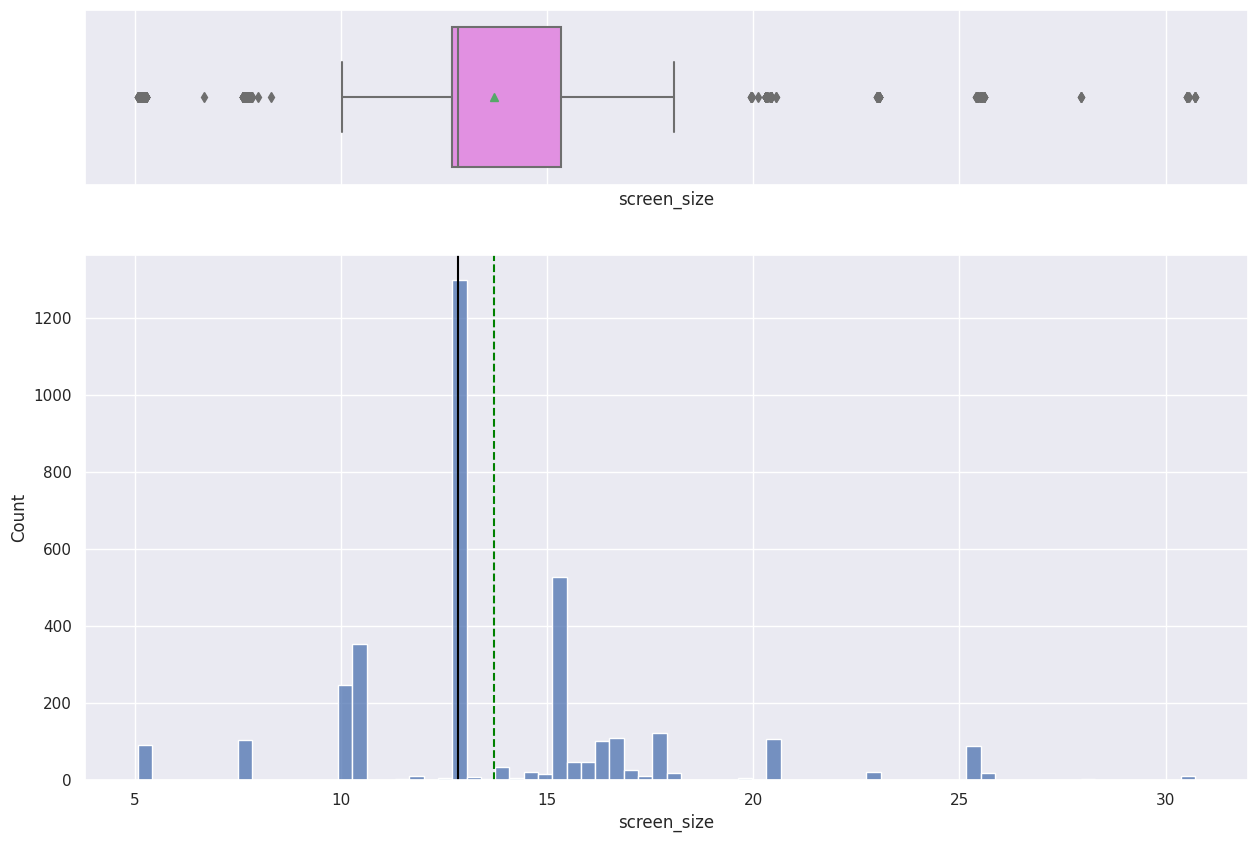

In [16]:
histogram_boxplot(df, "screen_size")

**Observations:**
* Around 50% of the devices have a screen larger than 13 cm.
* There are 31 different brands with a screen size larger than 6 inches.

**main_camera_mp**

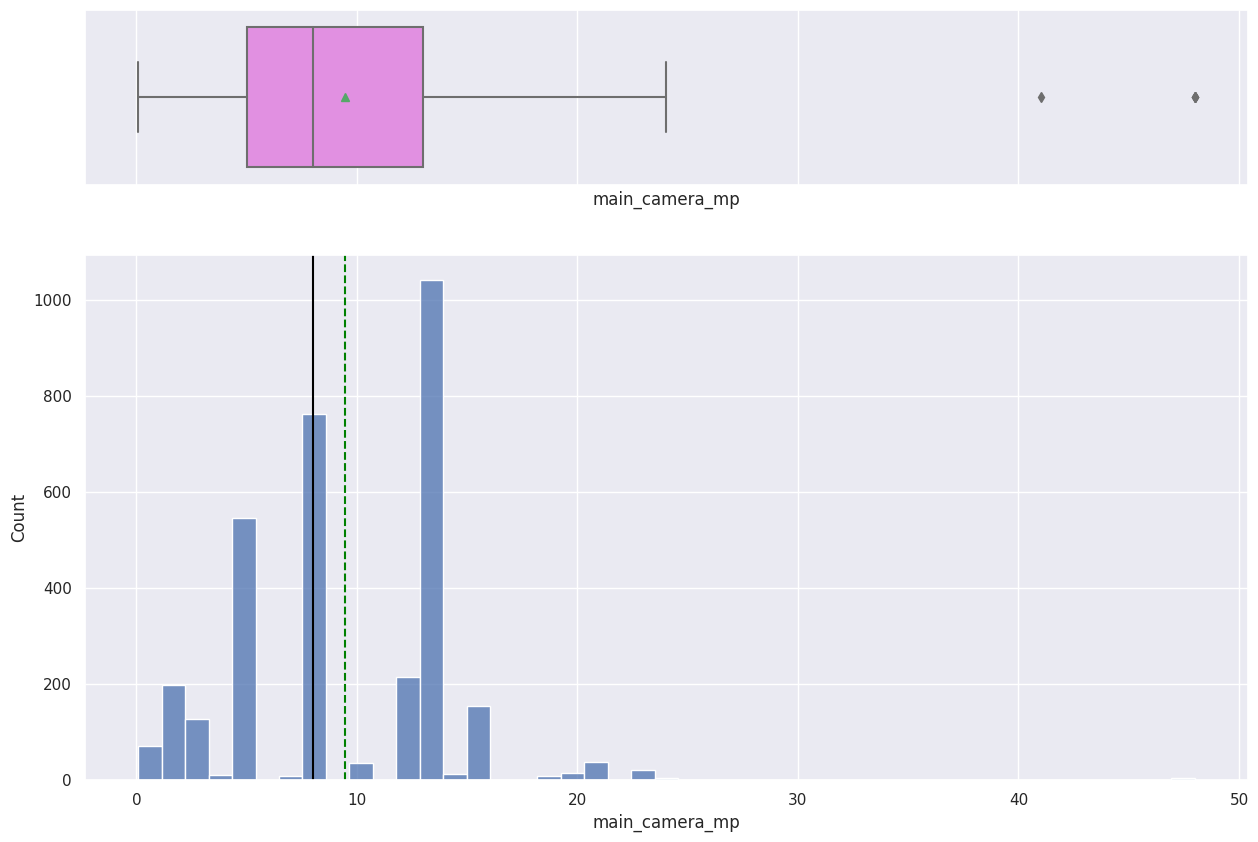

In [17]:
histogram_boxplot(df, "main_camera_mp")

**Observations:** few devices offer rear cameras with more than 20MP resolution.

**selfie_camera_mp**

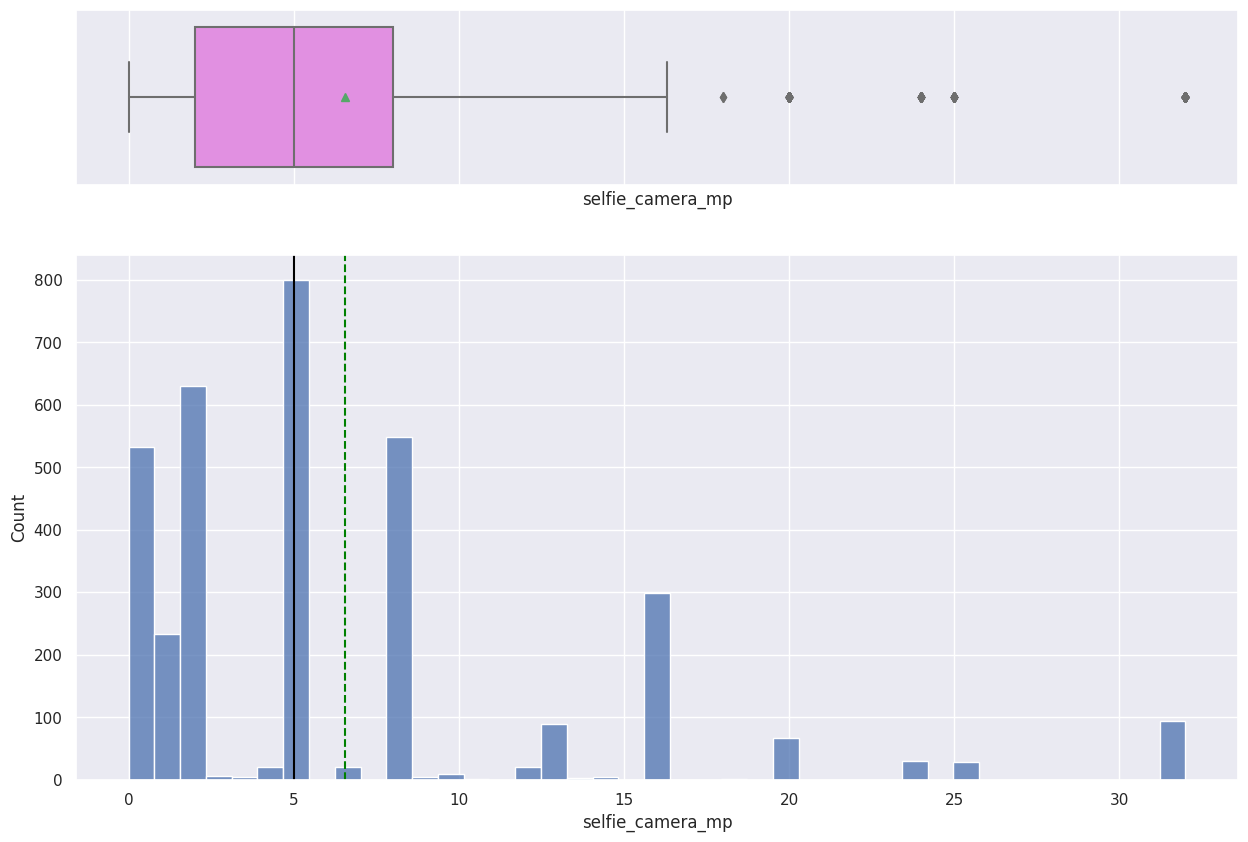

In [18]:
histogram_boxplot(df, "selfie_camera_mp")

**Observations:** some devices do not provide a front camera (most likely the feature phones), while few devices offer ones with more than 16MP resolution.

**int_memory**

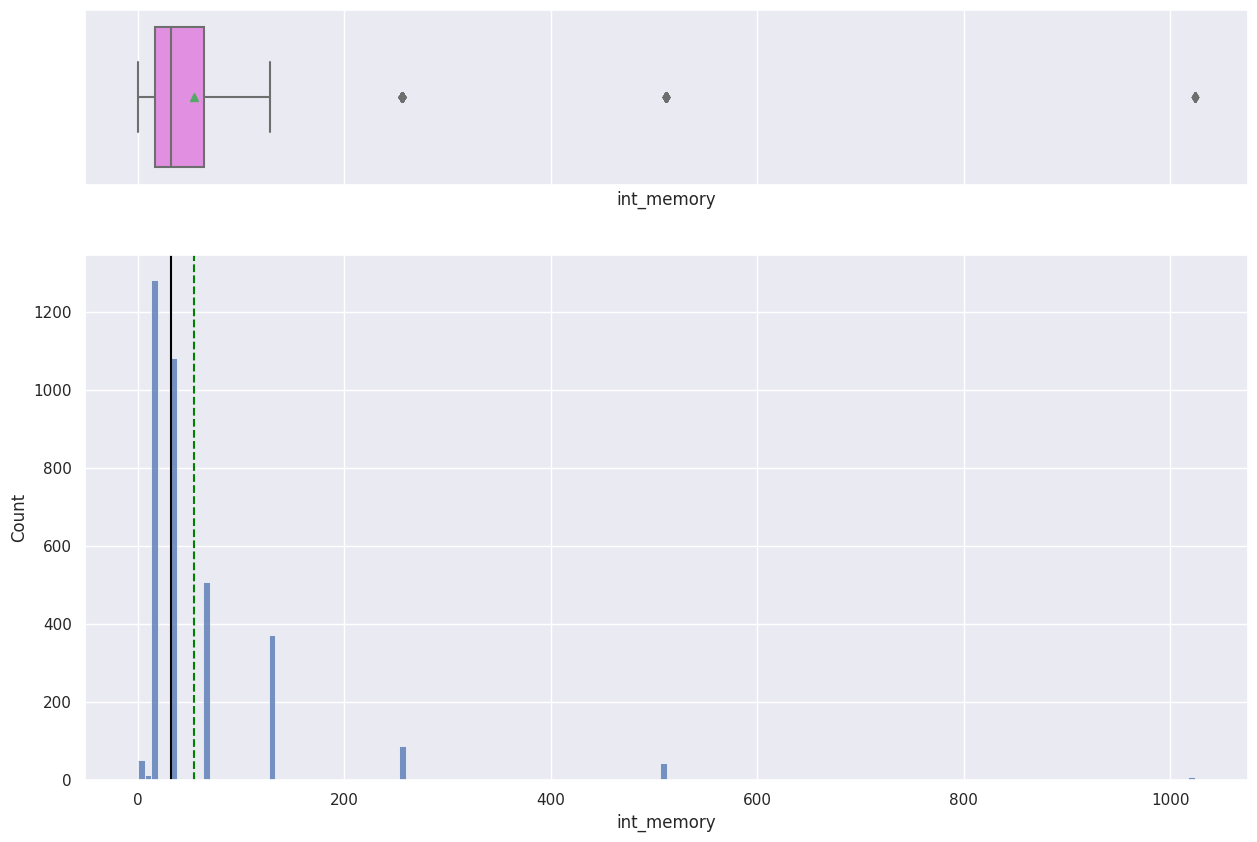

In [19]:
histogram_boxplot(df, "int_memory")

**Observations:** few devices have more than 256GB internal memory.

**ram**

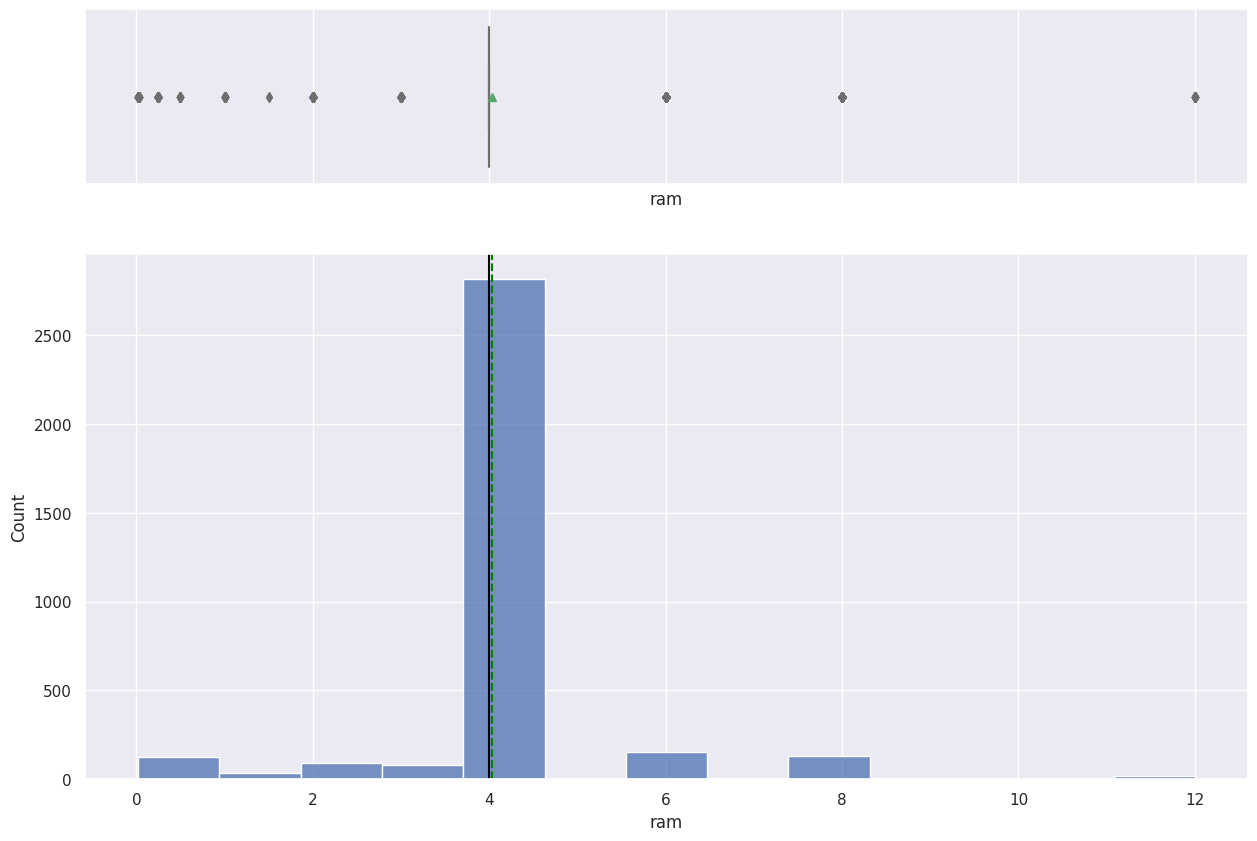

In [20]:
histogram_boxplot(df, 'ram')

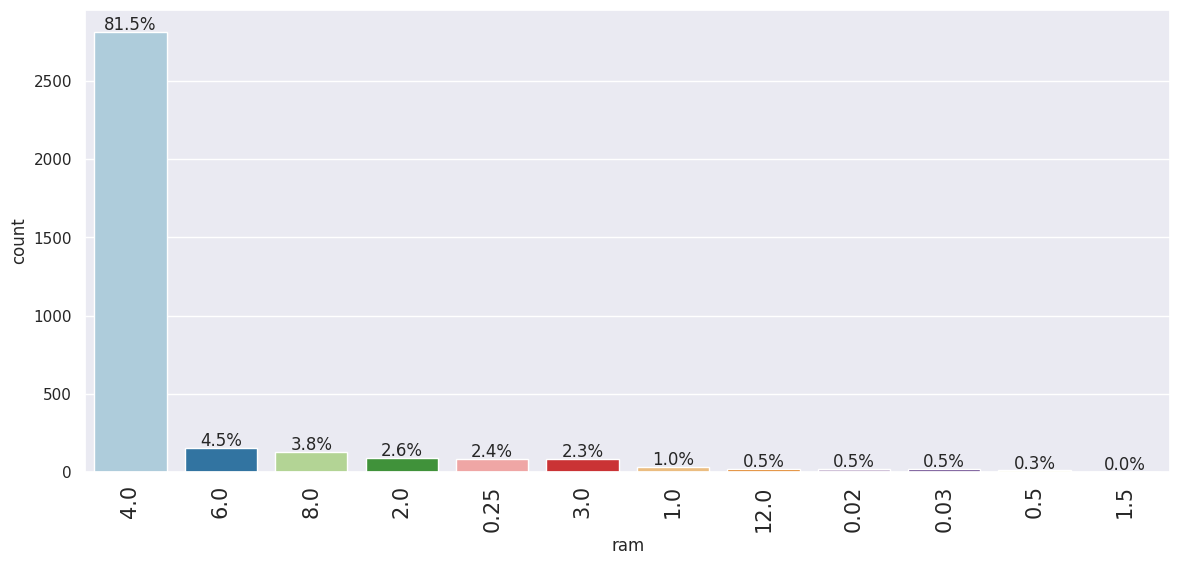

In [21]:
labeled_barplot(df, "ram", perc=True)

**Observations:** 81.5% of the devices have 4GB of RAM.

**weight**

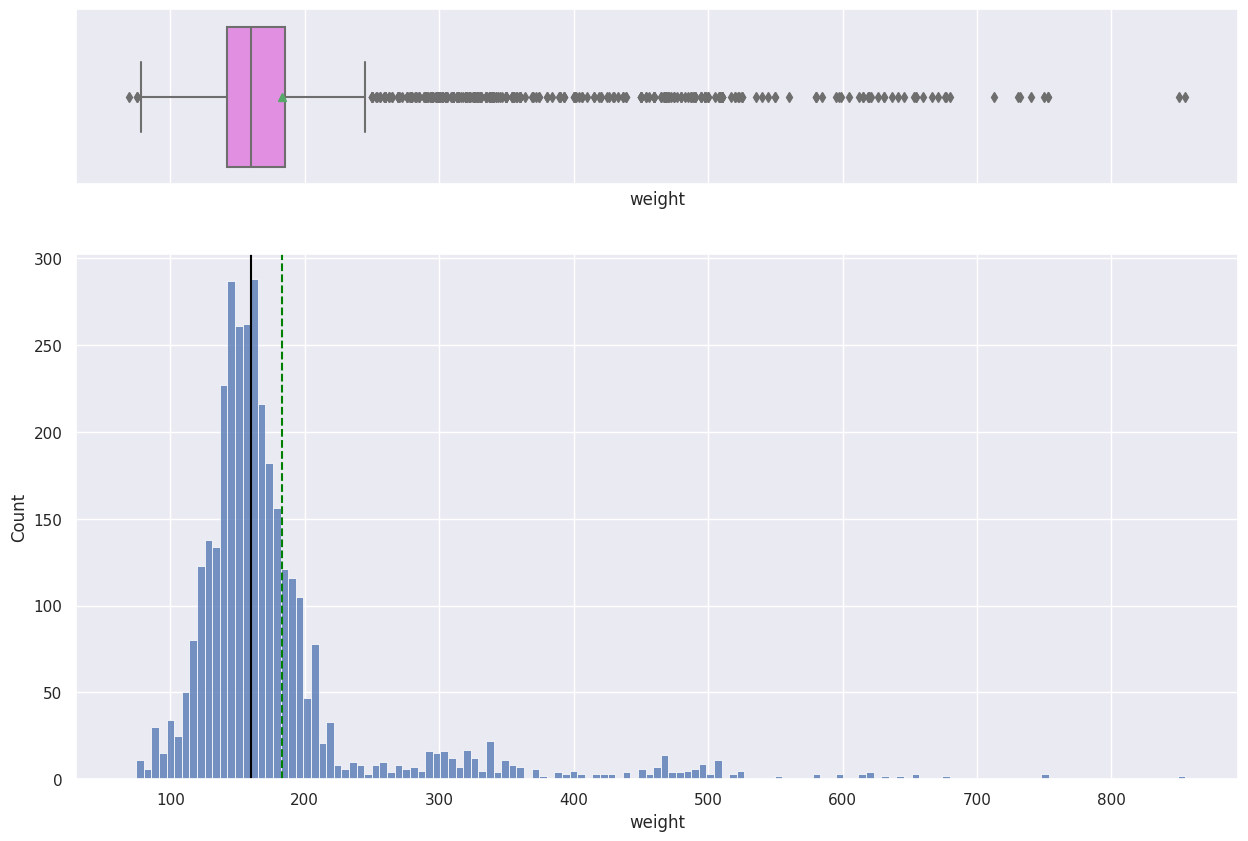

In [22]:
histogram_boxplot(df, "weight")

**Observations:** the distribution of weight is right-skewed and has many upper outliers.

**battery**

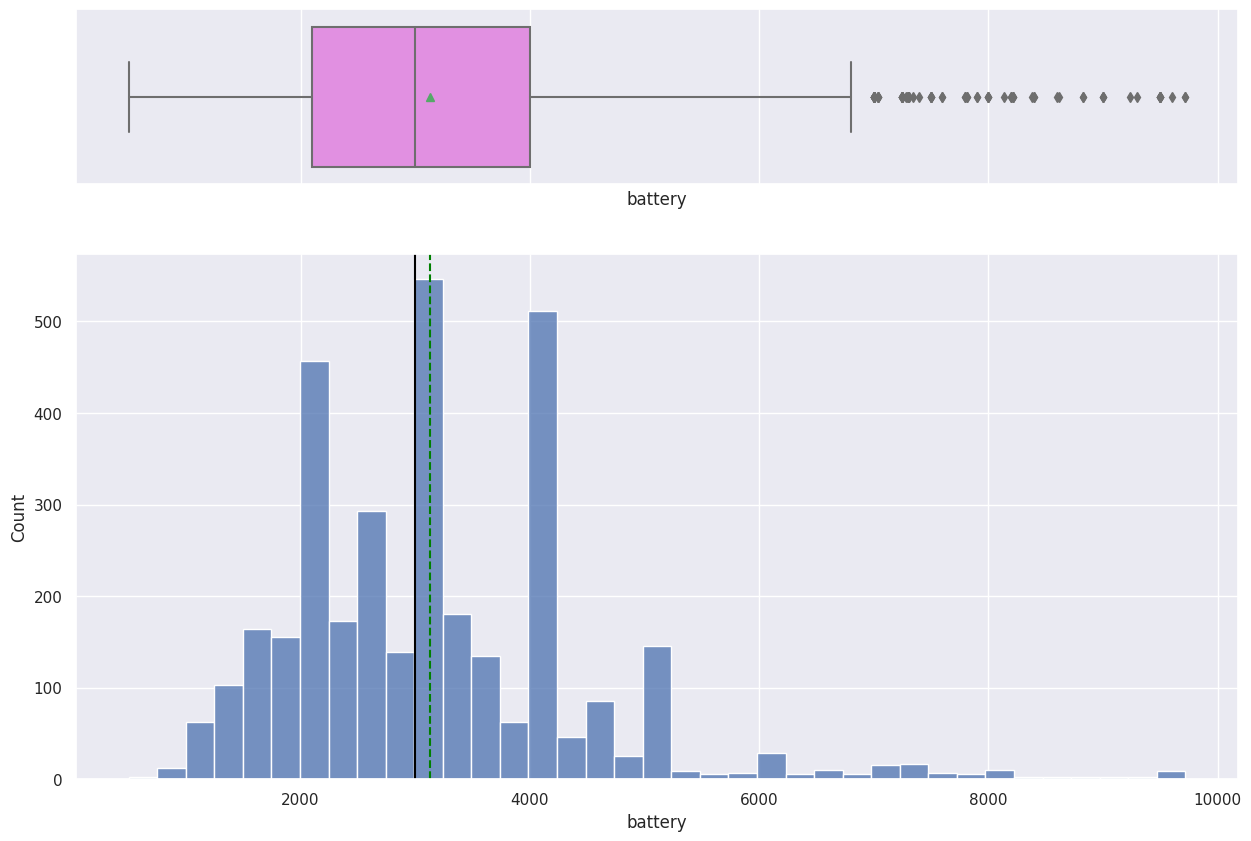

In [23]:
histogram_boxplot(df, "battery")

**Observations:** the distribution of energy capacity of battery is close to normally distributed with a few upper outliers.

**days_used**

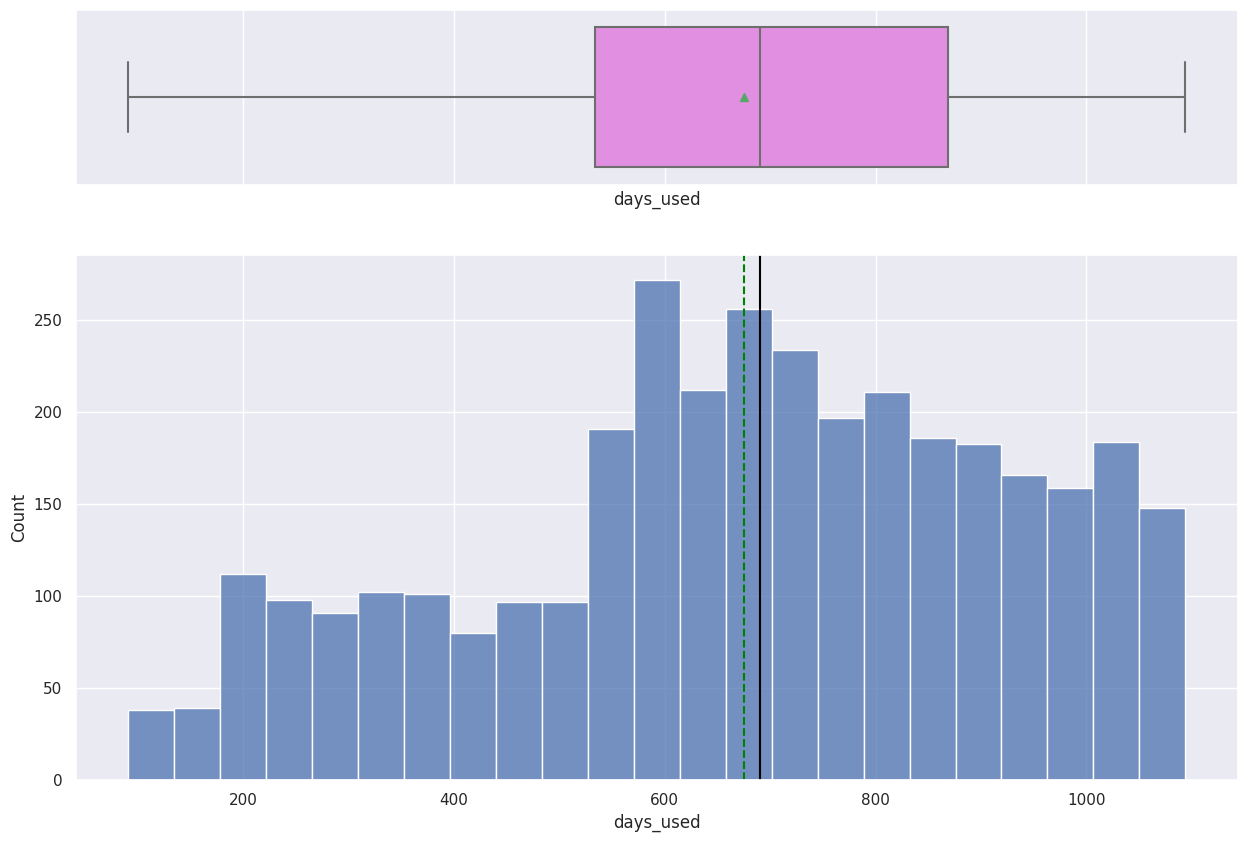

In [24]:
histogram_boxplot(df, "days_used")

**Observations:** around 50% of the devices in the data have been used for more than 700 days.

**os**

What percentage of the used device market is dominated by Android devices?

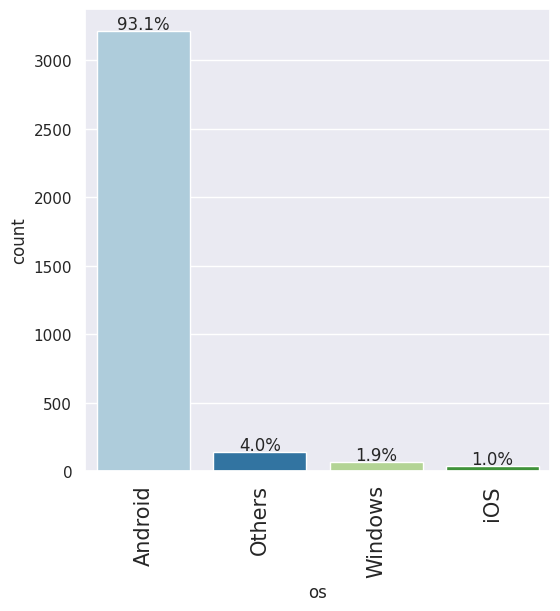

In [25]:
labeled_barplot(df, "os", perc=True)

**Observations:** Android devices dominate ~93% of the used device market.

**4g**

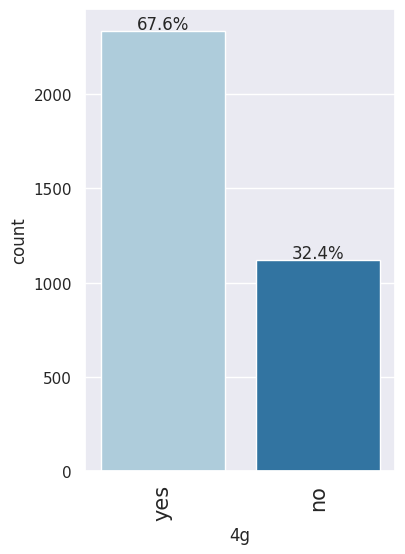

In [26]:
labeled_barplot(df, "4g", perc=True)

**Observations:** nearly two-thirds of the devices in this data have 4G available.

**5g**

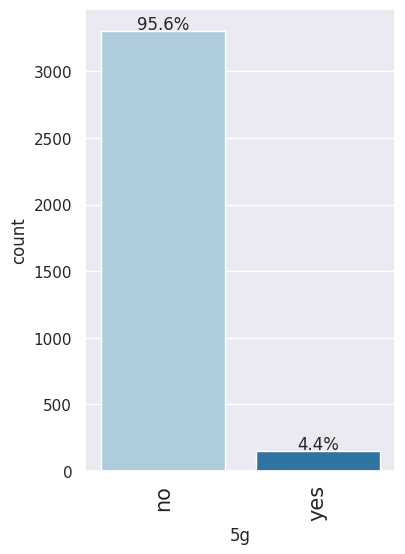

In [27]:
labeled_barplot(df, "5g", perc=True)

**Observations:** only a handful of devices in this data provide 5G network.

**release_year**

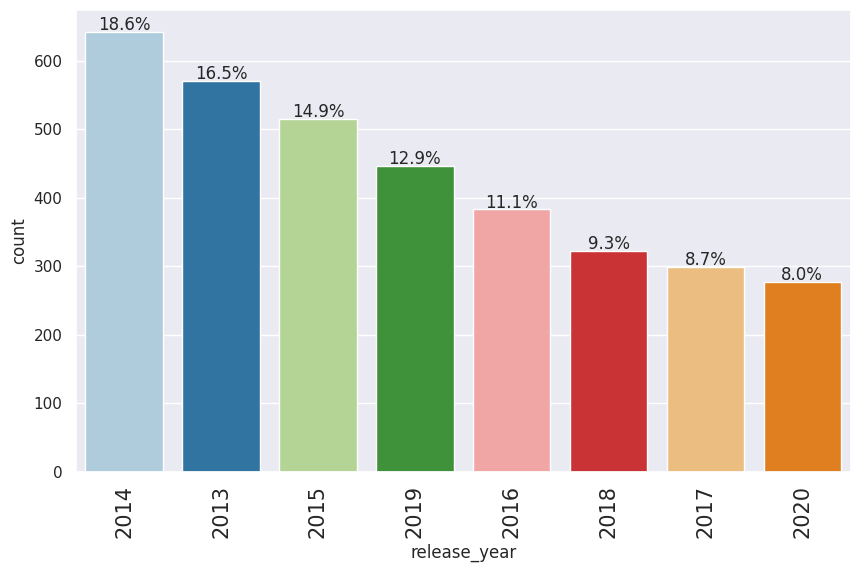

In [28]:
labeled_barplot(df, "release_year", perc=True)

**Observations:**
* Most devices are from 2014.
* Around 50% of the devices in the data were originally released in 2015 or before.

## **Bivariate Analysis**

**Correlation Check**

Which attributes are highly correlated with the normalized price of a used device?

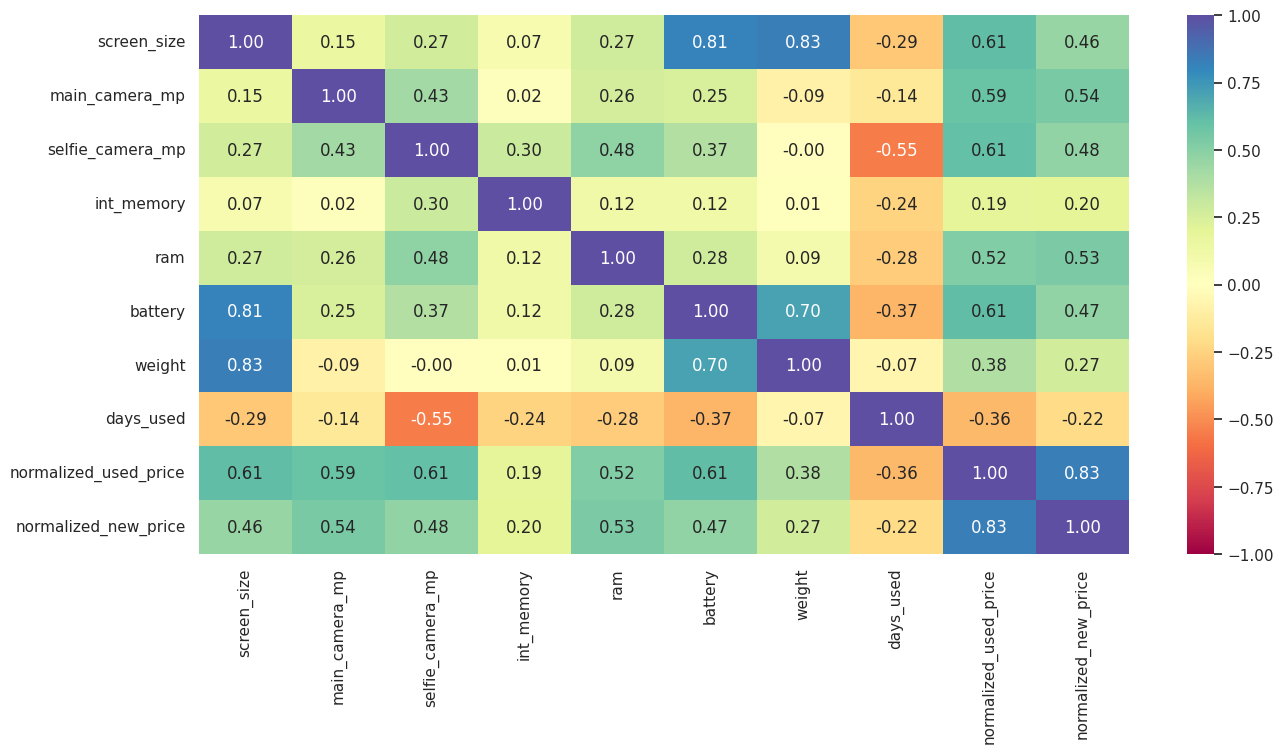

In [29]:
cols_list = df.select_dtypes(include=np.number).columns.tolist()
cols_list.remove("release_year")

plt.figure(figsize=(15, 7))
sns.heatmap(
    df[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

**Observations:**
* The normalized used device price is highly correlated with the normalized price of a new device model. This makes sense as the price of a new model is likely to affect the used device price. The normalized used price of a device has an 0.83 correlation factor with the normalized price of a used device.
* The normalized used device price is also moderately correlated with the resolution of the cameras provided, the size of the screen, and the battery capacity.
* Weight, screen size, and battery capacity of a device show a good amount of correlation. This makes sense as larger battery capacity requires bigger space, thereby increasing screen size and weight.
* The number of days a device is used is negatively correlated with the resolution of its front camera. This makes sense as older devices did not offer as powerful front cameras as the recent ones.

**brand_name vs ram**

The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?

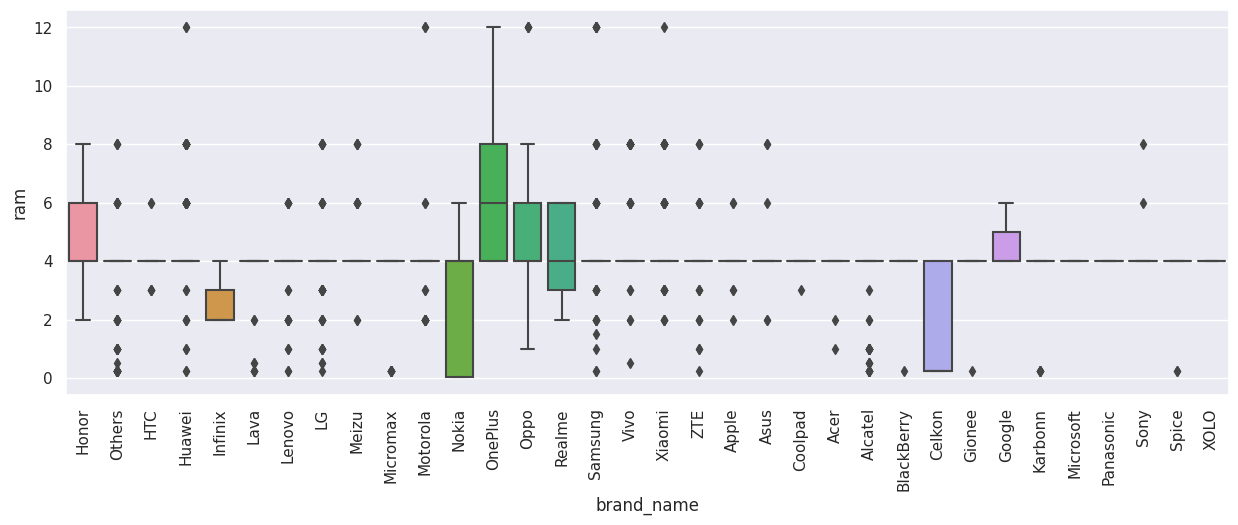

In [30]:
plt.figure(figsize=(15, 5))
sns.boxplot(data=df, x="brand_name", y="ram")
plt.xticks(rotation=90)
plt.show()

**Observations:**
* 50% of the devices offered by most of the companies hve 4GB of RAM.
* 50% of OnePlus devices have 6GB or more RAM, indicating that OnePlus devices offer more RAM in general.
* OnePlus has the highest amount of RAM while Celkon has a below average amount of RAM.

**Large Battery**

A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?

In [31]:
df_large_battery = df[df.battery > 4500]
df_large_battery.shape

(341, 15)

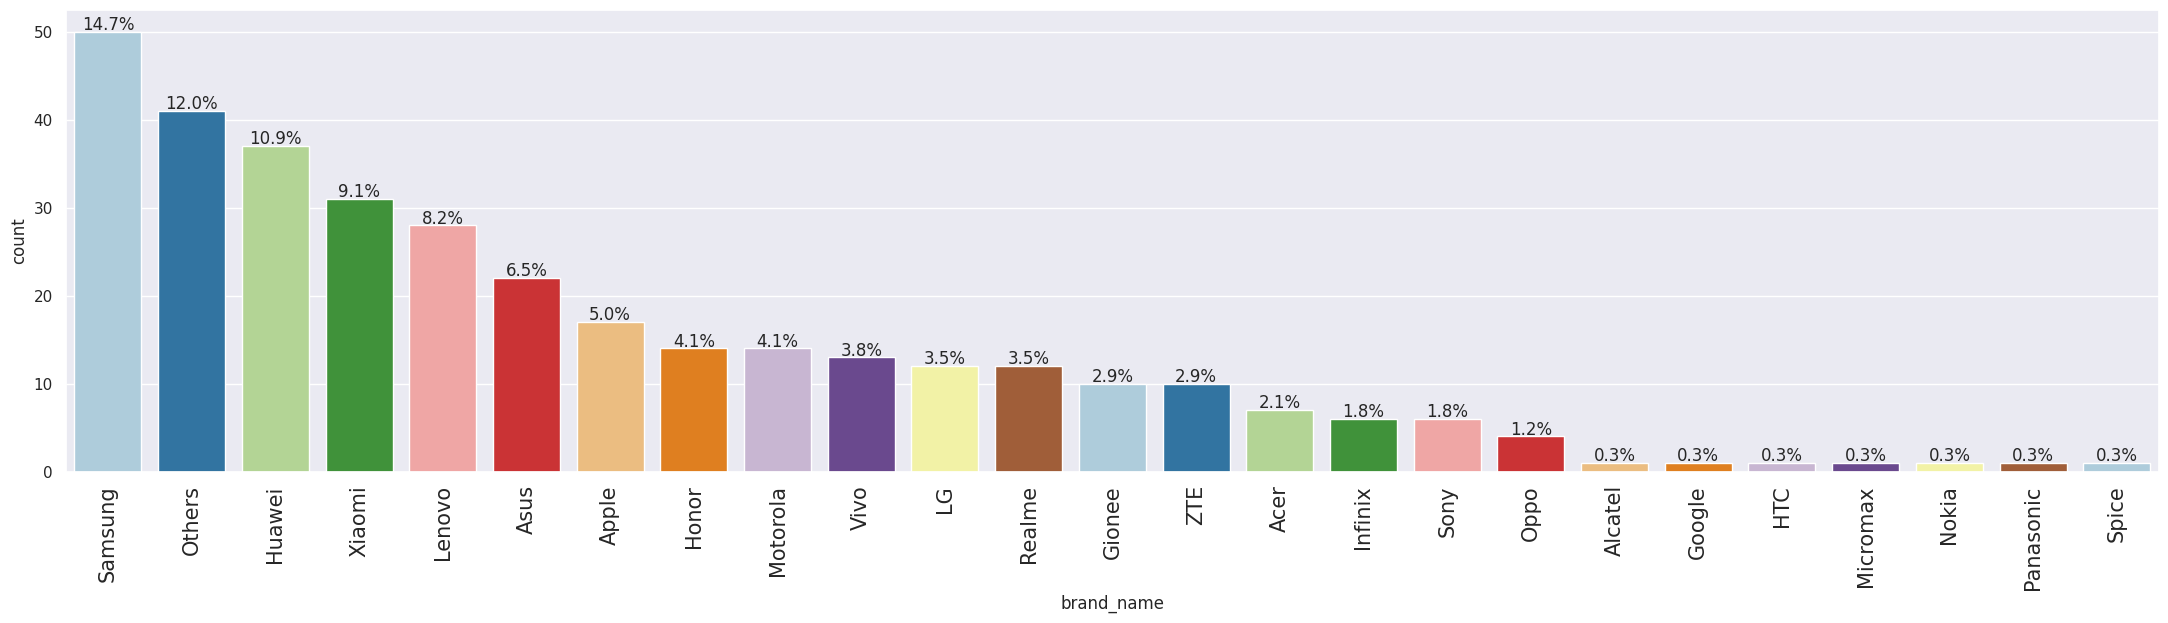

In [32]:
labeled_barplot(df_large_battery, 'brand_name', perc=True)

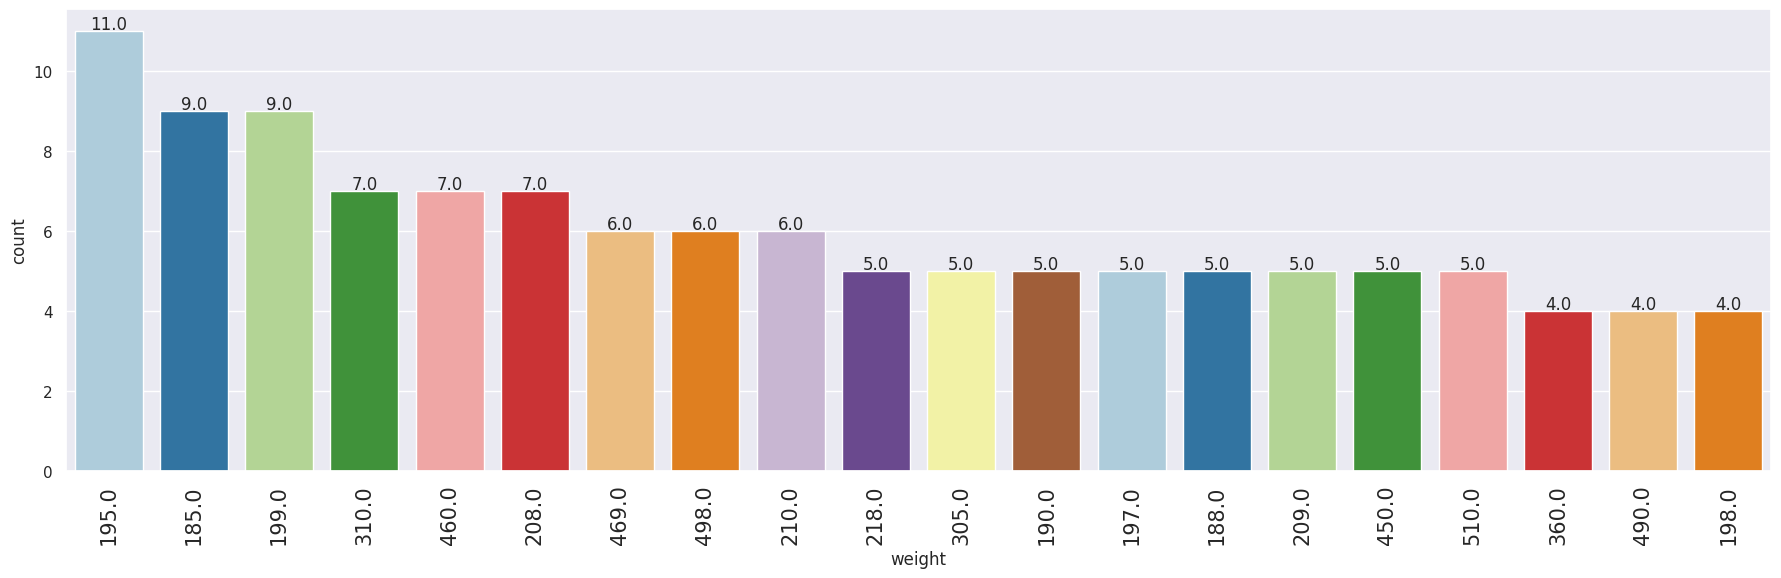

In [33]:
labeled_barplot(df_large_battery, 'weight', n=20)

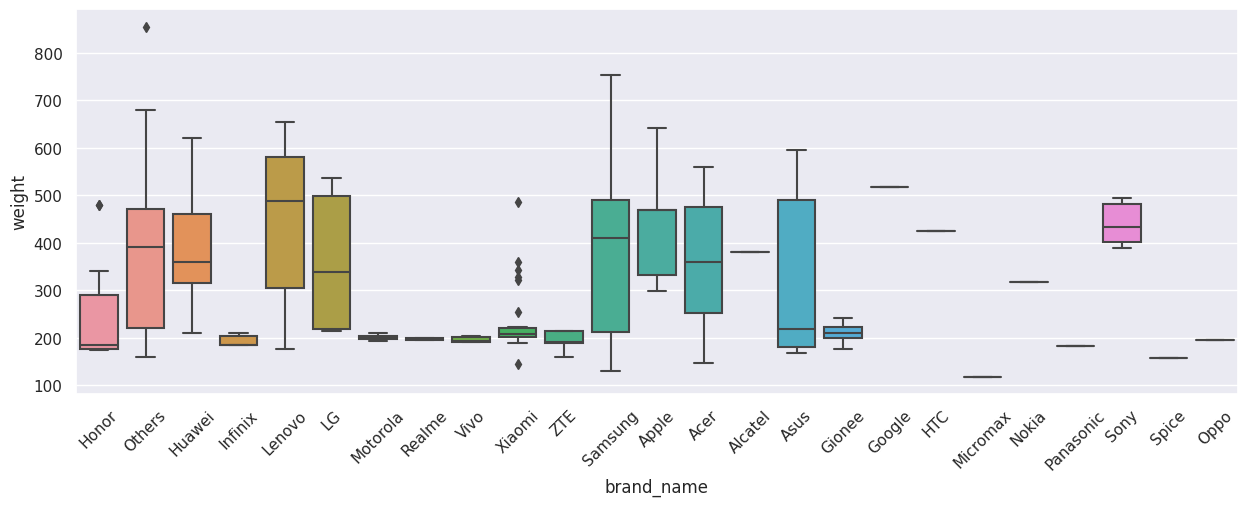

In [34]:
plt.figure(figsize=(15, 5))
sns.boxplot(data=df_large_battery, x = 'brand_name', y = 'weight')
plt.xticks(rotation=45)
plt.show()

**Observations:**
* A lot of brands offer devices which are not very heavy but have a large battery capacity.
* Some devices offered by brands like Vivo, Realme, Motorola, etc. weigh just about 200g but offer great batteries.
* Some devices offered by brands like Huawei, Apple, Sony, etc. offer great batteries but are heavier.
* Samsung has the highest weight amongst devices.

**Bigger Screens**

Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?

In [35]:
df_large_screen = df[df.screen_size > 6 * 2.54]
df_large_screen.shape

(1099, 15)

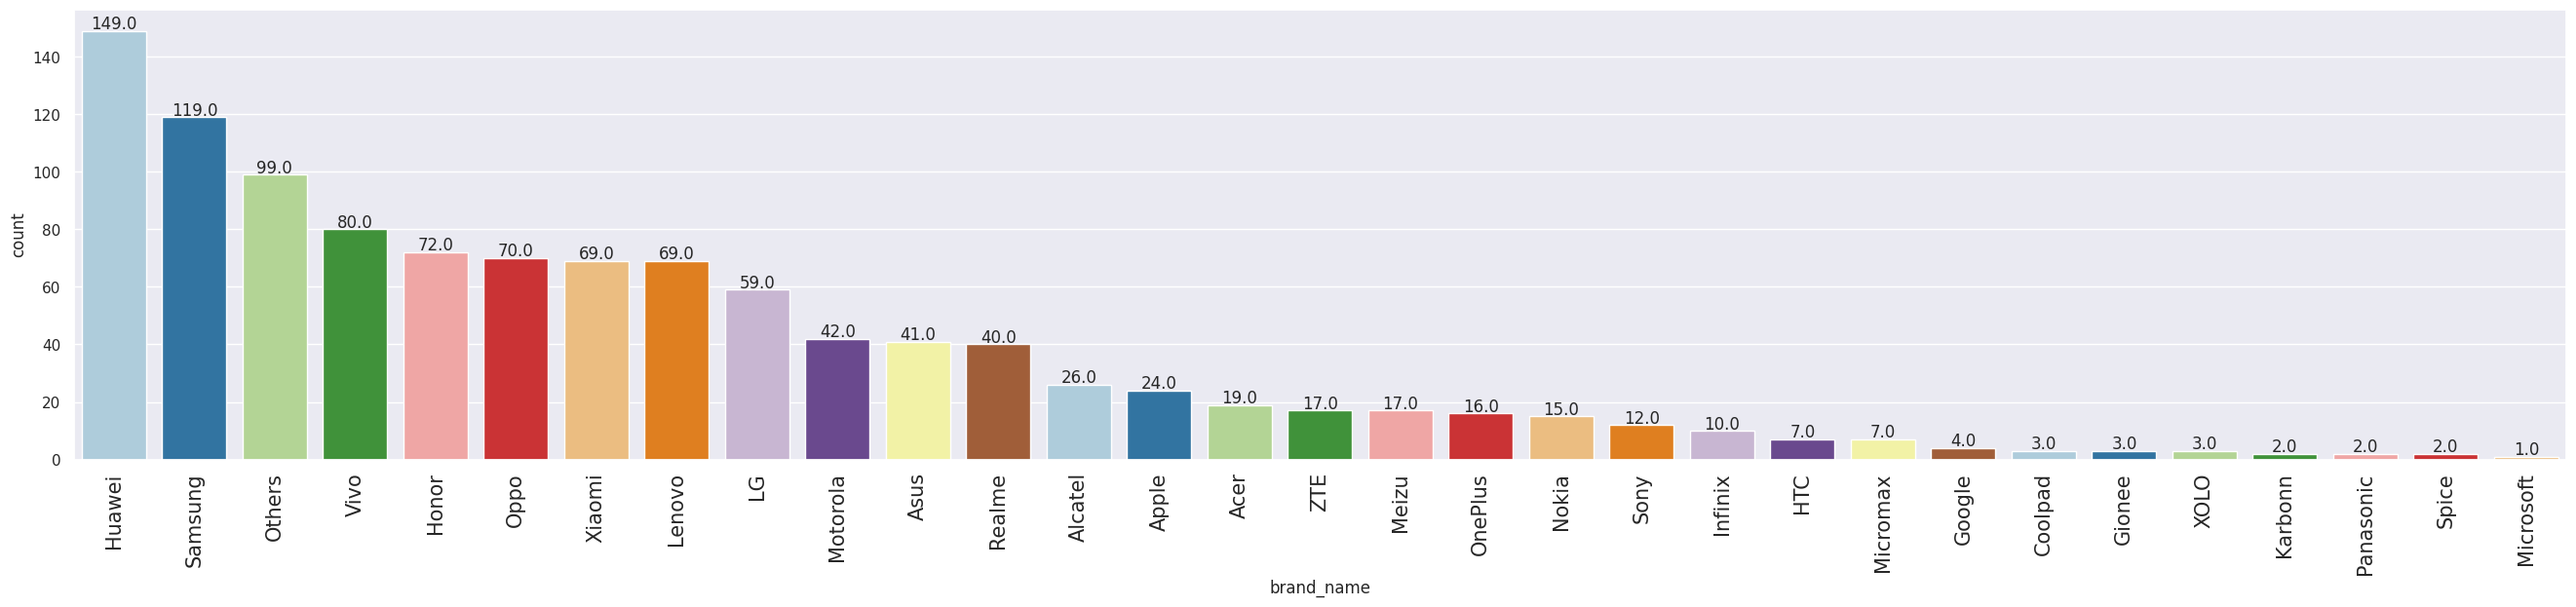

In [36]:
labeled_barplot(df_large_screen, 'brand_name')

**Observations:** Huawei and Samsung offer a lot of devices suitable for customers buying phones and tablets for entertainment purposes.

**Selfie Cameras**

A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?

In [37]:
df_selfie_camera = df[df.selfie_camera_mp > 8]
df_selfie_camera.shape

(655, 15)

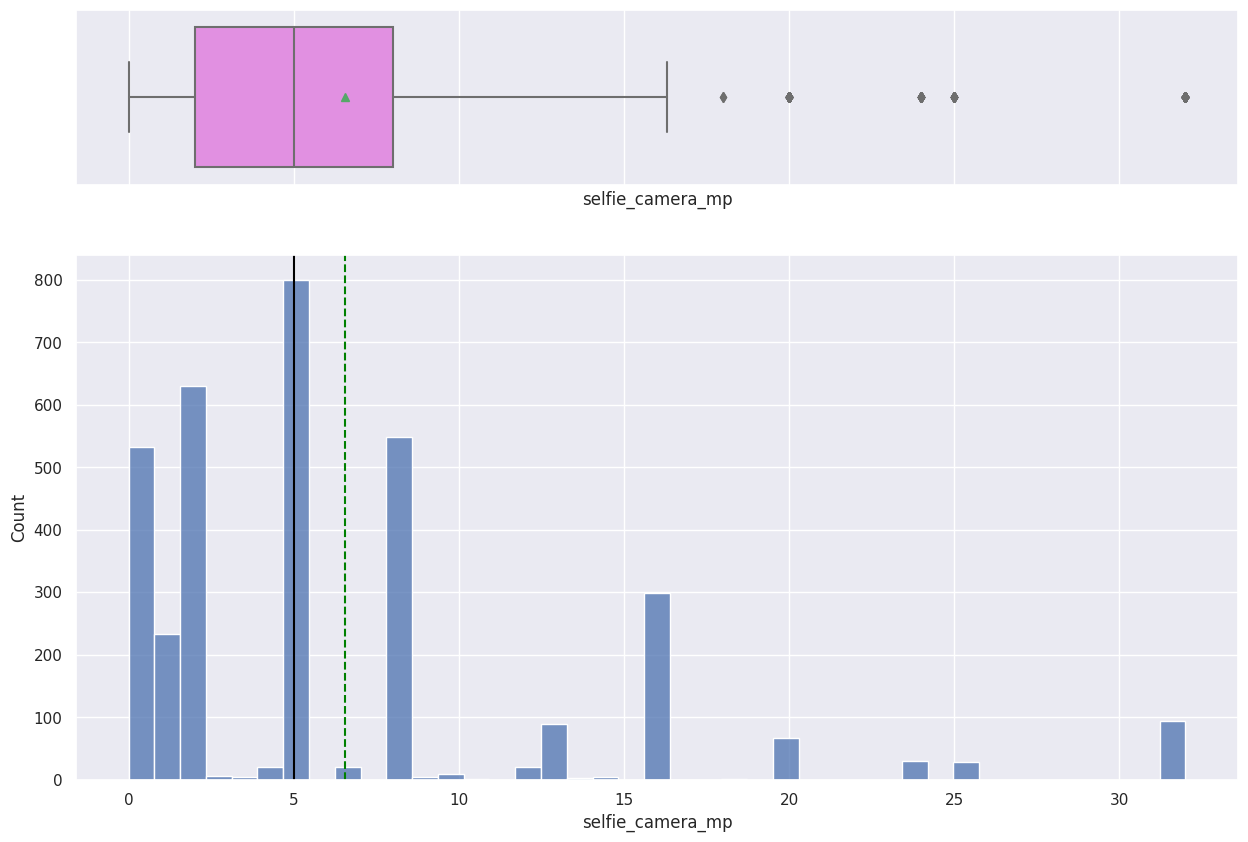

In [38]:
histogram_boxplot(df, 'selfie_camera_mp')

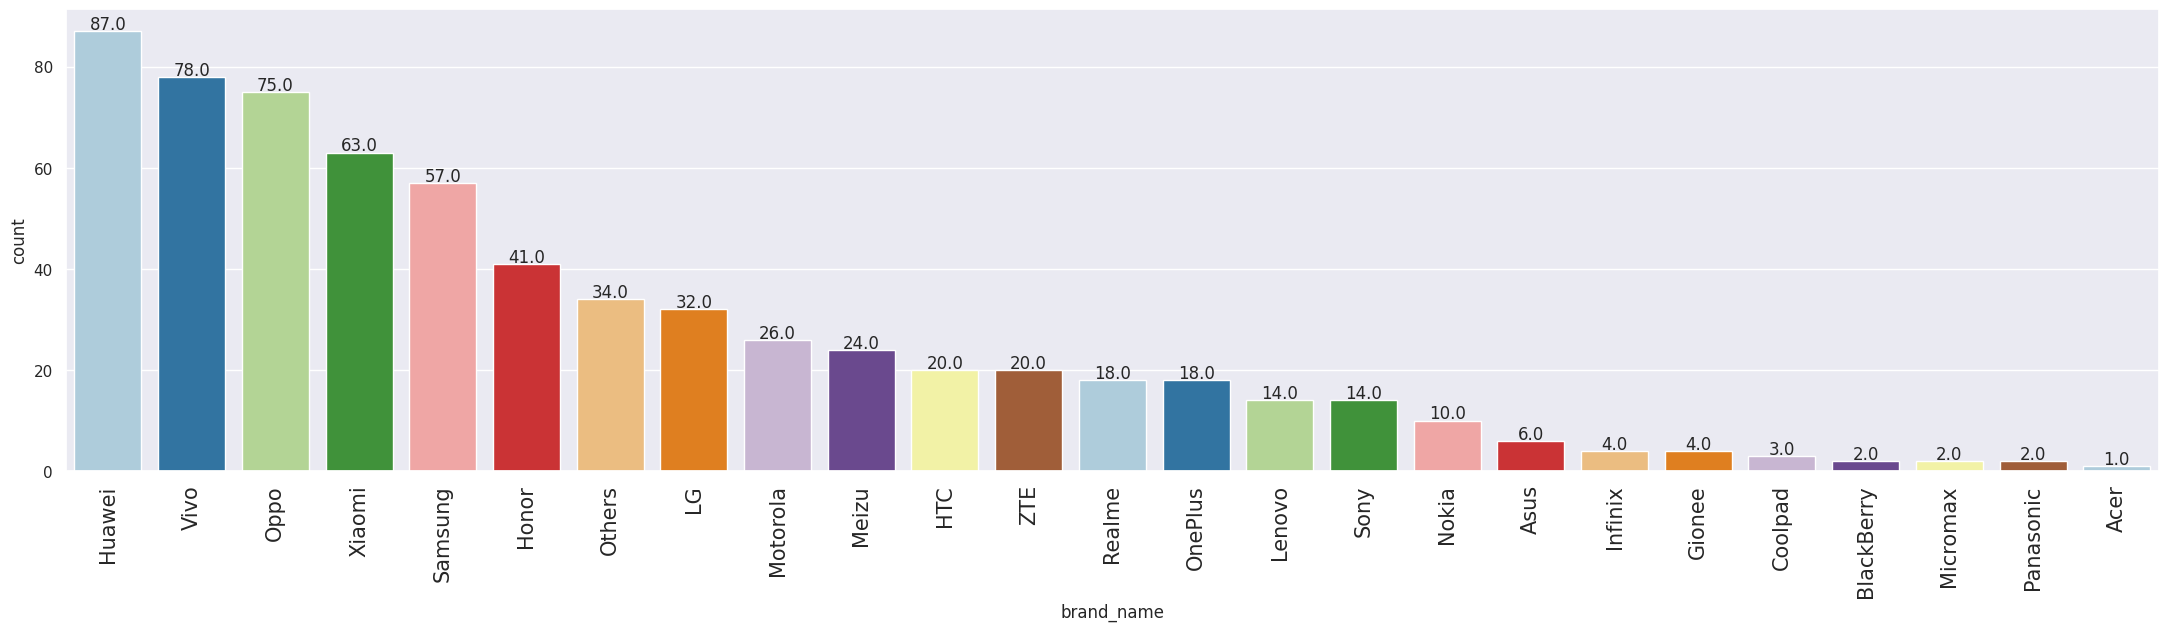

In [39]:
labeled_barplot(df_selfie_camera, 'brand_name')

**Observations:**
* 25 different brands offer 8MP selfie cameres or greater.
* Huawei is the go-to brand for this customer segment as they offer many devices with powerful selfie cameras.
* Oppo and Vivo also offer a lot of devices suitable for this customer segment.

**Main Cameras:** Rear cameras generally have a better resolution than front cameras, so we set the threshold higher for them at 16MP.

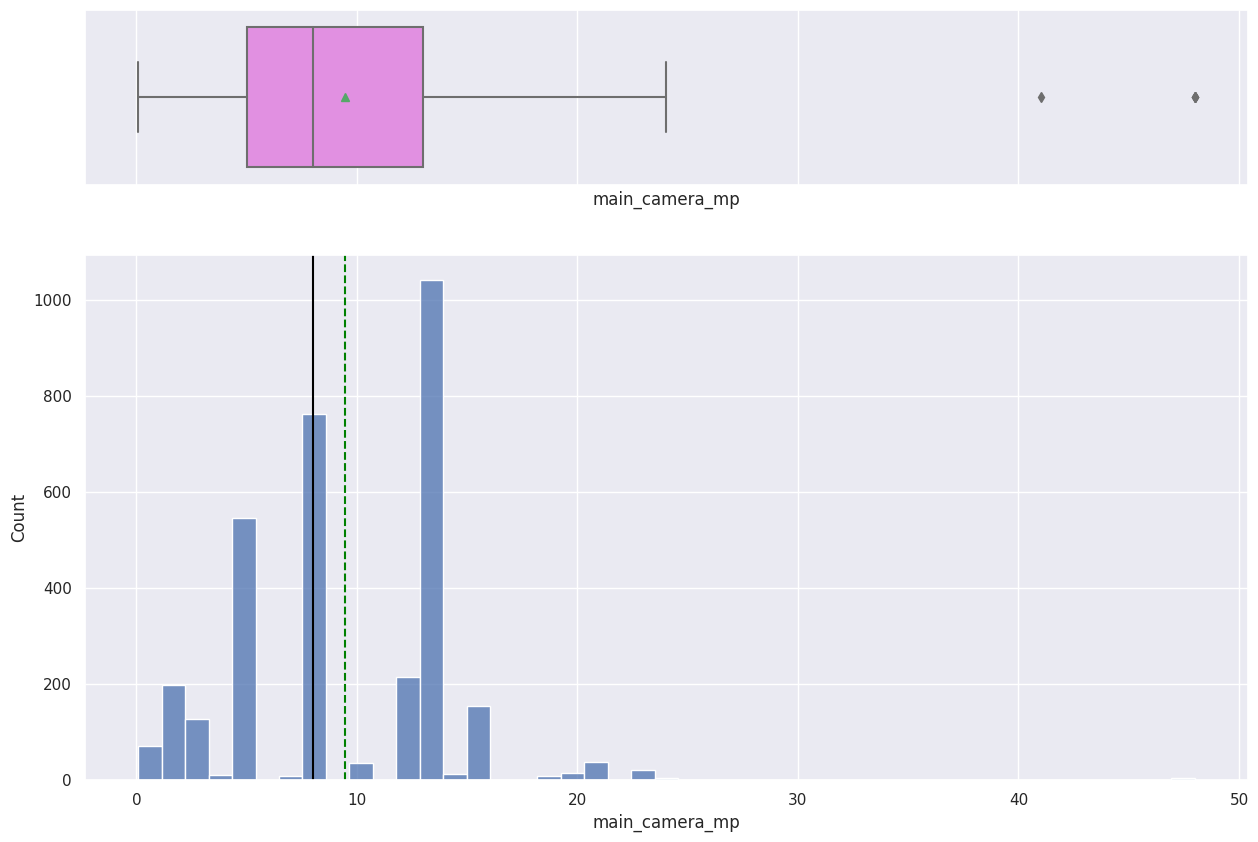

In [40]:
histogram_boxplot(df, 'main_camera_mp')

In [41]:
df_main_camera = df[df.main_camera_mp > 16]
df_main_camera.shape

(94, 15)

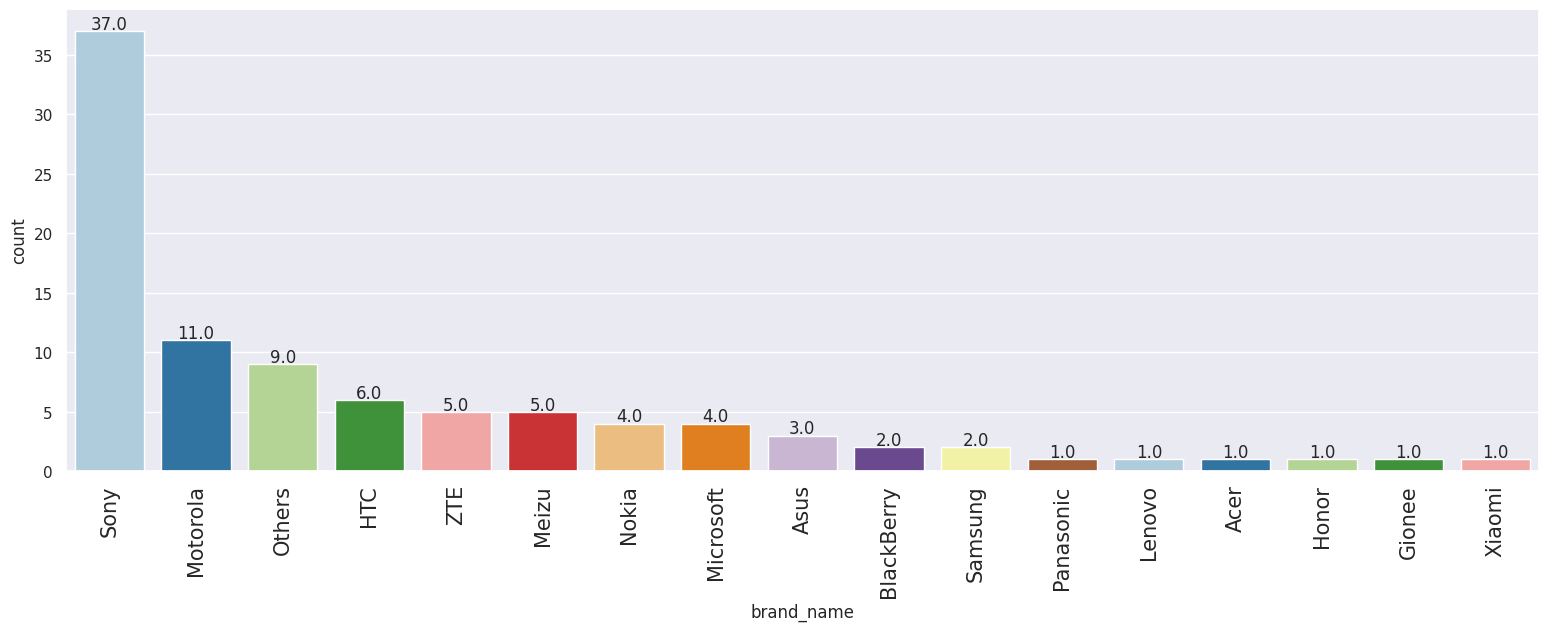

In [42]:
labeled_barplot(df_main_camera, 'brand_name')

**Observations:** Sony is the go-to brand for great rear cameras as they offer many devices under this criteria.

**Normalized Used Price vs Release Year**

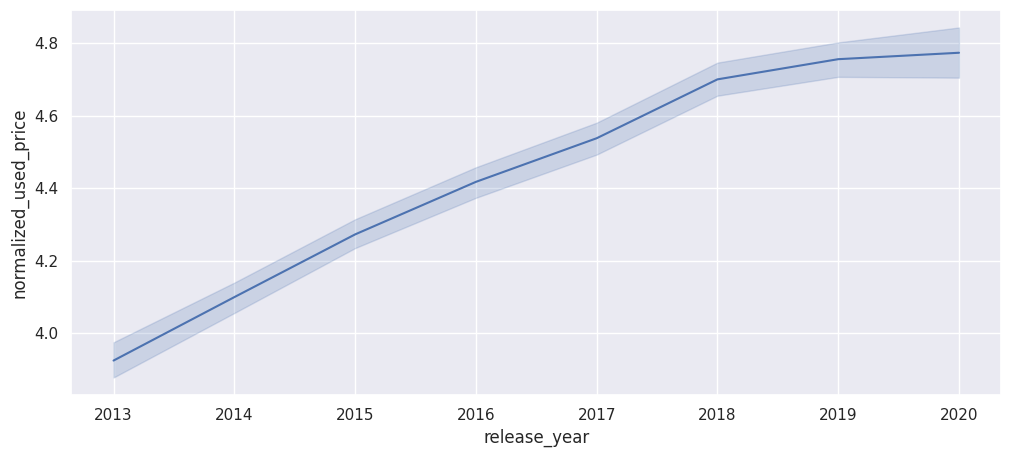

In [43]:
plt.figure(figsize=(12, 5))
sns.lineplot(df, x = 'release_year', y = 'normalized_used_price')
plt.show()

**Observations:** the price of used devices has increased over the years.

**Normalized New Price vs Release Year**

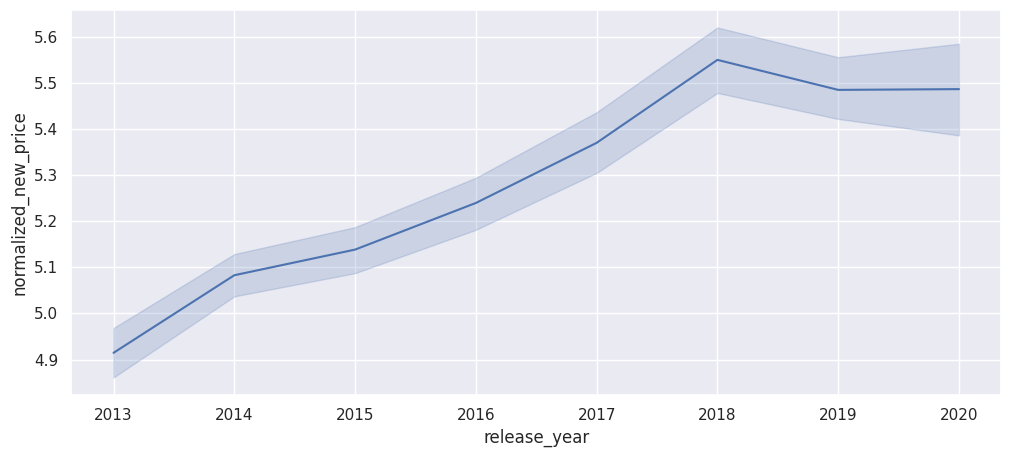

In [44]:
plt.figure(figsize=(12, 5))
sns.lineplot(df, x = 'release_year', y = 'normalized_new_price')
plt.show()

**Observations:** Overall, the price of new phones has increased from 2013 to 2018, with prices falling slightly in 2019 and steadying out into 2020.

**Normalized Used Prices vs 4G and 5G networks**

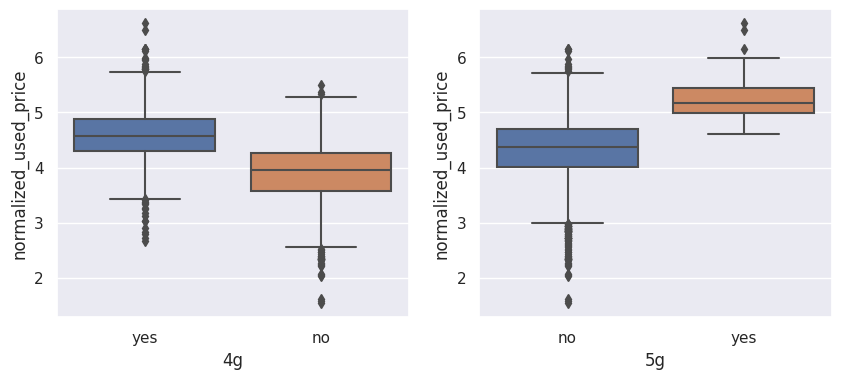

In [45]:
plt.figure(figsize=(10, 4))

plt.subplot(121)
sns.boxplot(data=df, x="4g", y="normalized_used_price")

plt.subplot(122)
sns.boxplot(data=df, x="5g", y="normalized_used_price")

plt.show()

**Observations:** used devices offering 4G and 5G networks are generally priced higher than the ones without 4G and 5G networks.

## Data Preprocessing

- Missing value treatment
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

In [46]:
# creating a copy of the data to see how treating missing values will impact the data
df1 = df.copy()

In [47]:
# checking for missing values
df1.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

In [48]:
cols_impute = [
    "main_camera_mp",
    "selfie_camera_mp",
    "int_memory",
    "ram",
    "battery",
    "weight",
]

for col in cols_impute:
    df1[col] = df1[col].fillna(
        value=df1.groupby(['release_year', 'brand_name'])[col].transform("median")
    ) # imputing column median by release year and brand name for missing values

# checking for missing values
df1.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 0
ram                        0
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

**Observations:** int_memory and ram have been treated by imputing the median value for missing values

In [49]:
cols_impute = [
    "main_camera_mp",
    "selfie_camera_mp",
    "battery",
    "weight",
]

for col in cols_impute:
    df1[col] = df1[col].fillna(
        value=df1.groupby(['brand_name'])[col].transform("median")
    ) # imputing median from brand name into all the missing values

# checking for missing values
df1.isnull().sum()

brand_name                0
os                        0
screen_size               0
4g                        0
5g                        0
main_camera_mp           10
selfie_camera_mp          0
int_memory                0
ram                       0
battery                   0
weight                    0
release_year              0
days_used                 0
normalized_used_price     0
normalized_new_price      0
dtype: int64

**Observations:** selfie_camera_mp, battery, and weight have all been treated for missing values.

In [50]:
# imputin median from main_camera_mp into all the missing values in main_camera_mp
df1['main_camera_mp'].fillna(df1['main_camera_mp'].median(), inplace=True)

# checking for missing values
df1.isnull().sum()

brand_name               0
os                       0
screen_size              0
4g                       0
5g                       0
main_camera_mp           0
selfie_camera_mp         0
int_memory               0
ram                      0
battery                  0
weight                   0
release_year             0
days_used                0
normalized_used_price    0
normalized_new_price     0
dtype: int64

**Observations:** all missing values have been imputed.

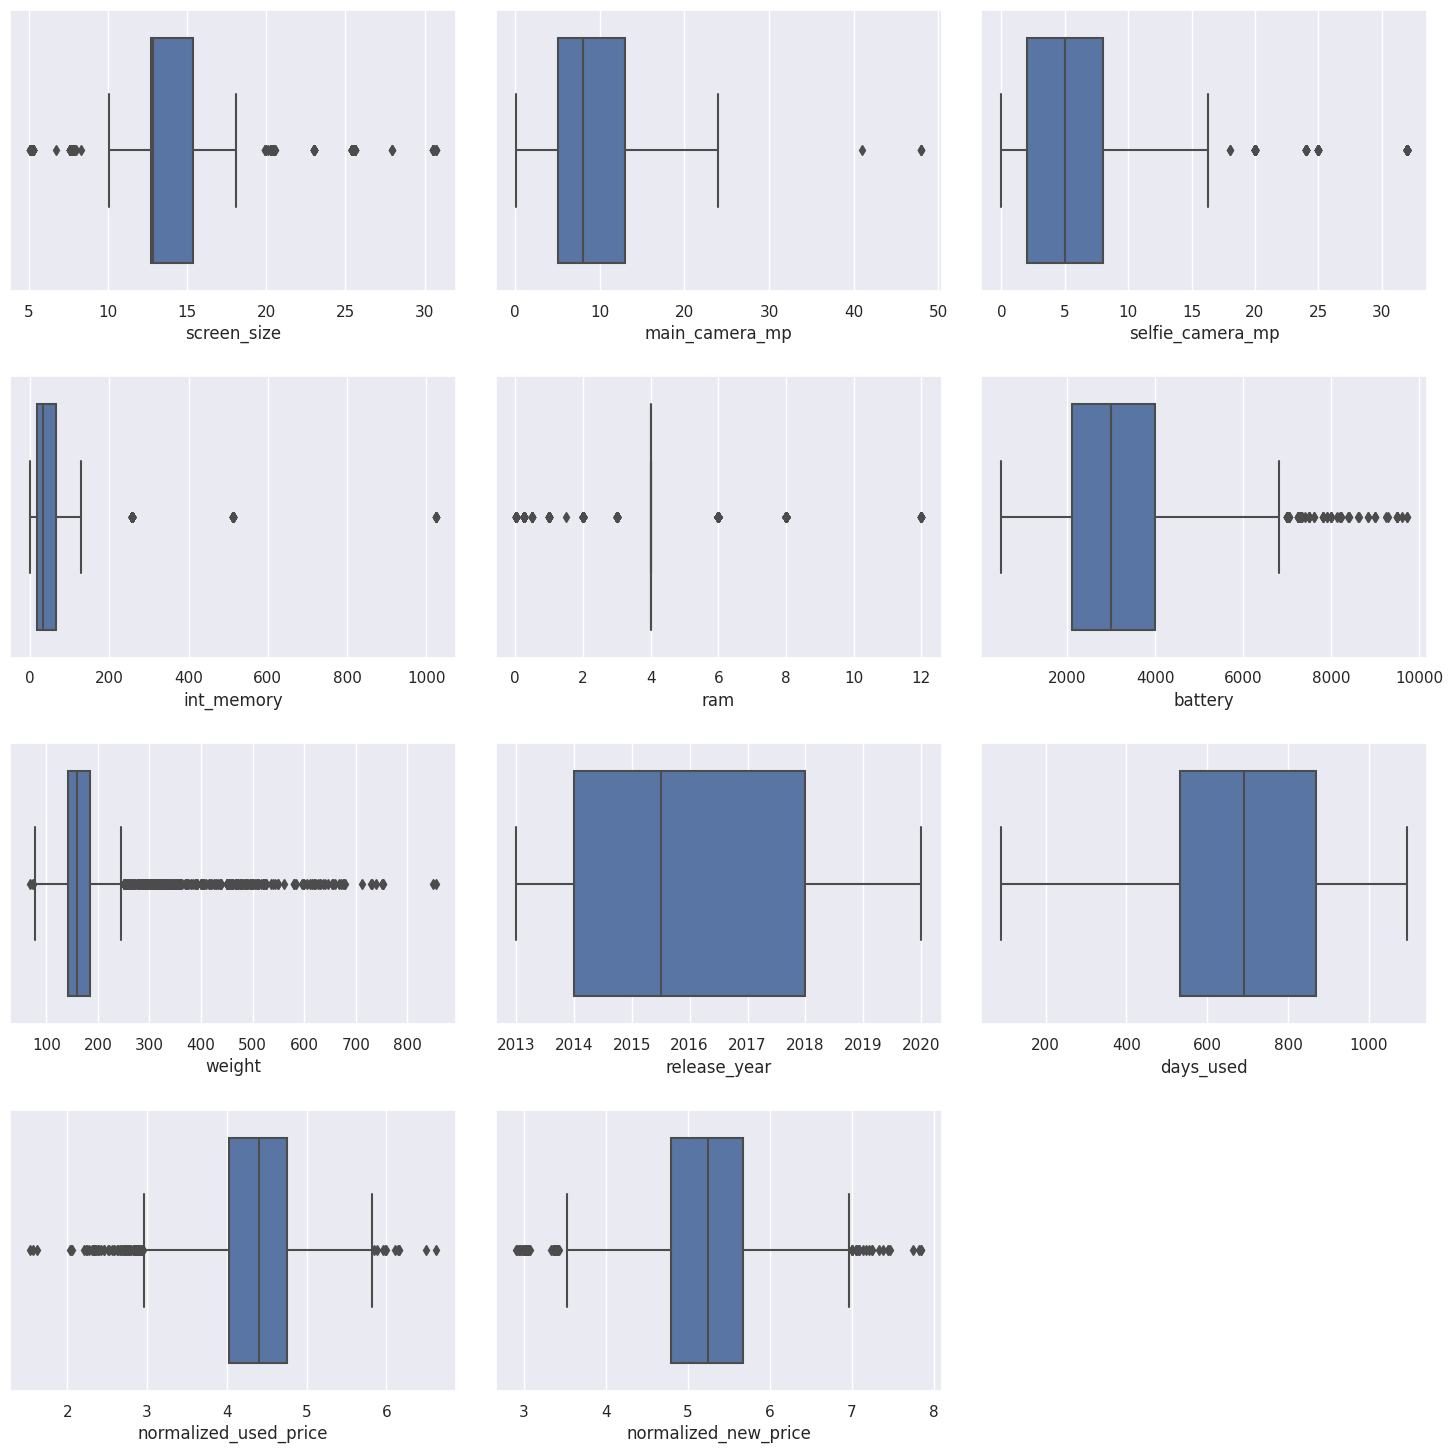

In [51]:
# Outlier Check
num_cols = df1.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 15))

for i, variable in enumerate(num_cols):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(data=df1, x=variable)
    plt.tight_layout(pad=2)

plt.show()

**Observations:** there are a lot of outliers in the data, but they will not be treated since they are proper values.

**Feature Engineering**

In [52]:
# Creating a new column years_since_release from the release_year column
df1["years_since_release"] = 2021 - df1["release_year"]

# dropping the release_year column
df1.drop("release_year", axis=1, inplace=True)

# statistical summary
df1["years_since_release"].describe()

count    3454.000000
mean        5.034742
std         2.298455
min         1.000000
25%         3.000000
50%         5.500000
75%         7.000000
max         8.000000
Name: years_since_release, dtype: float64

**Observations:** 50% of the used devices in the data were originally released five and half years ago.

In [53]:
# checking the statistical summary of the modiefied dataset
df1.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
brand_name,3454,34,Others,502,NaN,NaN,NaN,NaN,NaN,NaN,NaN
os,3454,4,Android,3214,NaN,NaN,NaN,NaN,NaN,NaN,NaN
screen_size,3454.0,NaN,NaN,NaN,13.713115,3.80528,5.08,12.7,12.83,15.34,30.71
4g,3454,2,yes,2335,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5g,3454,2,no,3302,NaN,NaN,NaN,NaN,NaN,NaN,NaN
main_camera_mp,3454.0,NaN,NaN,NaN,9.617597,4.749438,0.08,5.0,8.0,13.0,48.0
selfie_camera_mp,3454.0,NaN,NaN,NaN,6.555067,6.96844,0.0,2.0,5.0,8.0,32.0
int_memory,3454.0,NaN,NaN,NaN,54.528474,84.934991,0.01,16.0,32.0,64.0,1024.0
ram,3454.0,NaN,NaN,NaN,4.03262,1.368598,0.02,4.0,4.0,4.0,12.0
battery,3454.0,NaN,NaN,NaN,3132.577446,1298.884193,500.0,2100.0,3000.0,4000.0,9720.0


**Data Preparation for Modeling**
* We want to predict the normalized price of used devices.
* Before we proceed to build a model, we'll have to encode categorical features.
* We'll split the data into train and test to be able to evaluate the model that we build on the train data.
* We will build a Linear Regression model using the train data and then check it's performance.

In [54]:
# defining the dependent and independent variables
x = df1.drop('normalized_used_price', axis=1)
y = df1['normalized_used_price']

print(x.head())
print()
print(y.head())

  brand_name       os  screen_size   4g   5g  main_camera_mp  \
0      Honor  Android        14.50  yes   no            13.0   
1      Honor  Android        17.30  yes  yes            13.0   
2      Honor  Android        16.69  yes  yes            13.0   
3      Honor  Android        25.50  yes  yes            13.0   
4      Honor  Android        15.32  yes   no            13.0   

   selfie_camera_mp  int_memory  ram  battery  weight  days_used  \
0               5.0        64.0  3.0   3020.0   146.0        127   
1              16.0       128.0  8.0   4300.0   213.0        325   
2               8.0       128.0  8.0   4200.0   213.0        162   
3               8.0        64.0  6.0   7250.0   480.0        345   
4               8.0        64.0  3.0   5000.0   185.0        293   

   normalized_new_price  years_since_release  
0              4.715100                    1  
1              5.519018                    1  
2              5.884631                    1  
3              5.6

In [55]:
# adding the intercept to the data
x = sm.add_constant(x)

In [56]:
# creating dummy variables
x = pd.get_dummies(
    x,
    columns=x.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)

In [57]:
x.head()

,const,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,days_used,normalized_new_price,...,brand_name_Spice,brand_name_Vivo,brand_name_XOLO,brand_name_Xiaomi,brand_name_ZTE,os_Others,os_Windows,os_iOS,4g_yes,5g_yes
0,1.0,14.50,13.0,5.0,64.0,3.0,3020.0,146.0,127,4.715100,...,0,0,0,0,0,0,0,0,1,0
1,1.0,17.30,13.0,16.0,128.0,8.0,4300.0,213.0,325,5.519018,...,0,0,0,0,0,0,0,0,1,1
2,1.0,16.69,13.0,8.0,128.0,8.0,4200.0,213.0,162,5.884631,...,0,0,0,0,0,0,0,0,1,1
3,1.0,25.50,13.0,8.0,64.0,6.0,7250.0,480.0,345,5.630961,...,0,0,0,0,0,0,0,0,1,1
4,1.0,15.32,13.0,8.0,64.0,3.0,5000.0,185.0,293,4.947837,...,0,0,0,0,0,0,0,0,1,0


In [58]:
x.tail()

,const,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,days_used,normalized_new_price,...,brand_name_Spice,brand_name_Vivo,brand_name_XOLO,brand_name_Xiaomi,brand_name_ZTE,os_Others,os_Windows,os_iOS,4g_yes,5g_yes
3449,1.0,15.34,13.0,8.0,64.0,6.0,5000.0,190.0,232,6.483872,...,0,0,0,0,0,0,0,0,1,0
3450,1.0,15.24,13.0,8.0,128.0,8.0,4000.0,200.0,541,6.251538,...,0,0,0,0,0,0,0,0,1,0
3451,1.0,15.80,13.0,5.0,32.0,3.0,4000.0,165.0,201,4.528829,...,0,0,0,0,0,0,0,0,1,0
3452,1.0,15.80,13.0,5.0,32.0,2.0,4000.0,160.0,149,4.624188,...,0,0,0,0,0,0,0,0,1,0
3453,1.0,12.83,13.0,5.0,16.0,2.0,4000.0,168.0,176,4.279994,...,0,0,0,0,0,0,0,0,1,0


In [59]:
x.shape

(3454, 49)

In [60]:
# splitting the data in a ratio of 70:30 for train to test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=1)

In [61]:
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 2417
Number of rows in test data = 1037


## **Model Building: Linear Regression**

In [62]:
olsmodel1 = sm.OLS(y_train, x_train).fit()
print(olsmodel1.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.845
Model:                               OLS   Adj. R-squared:                  0.842
Method:                    Least Squares   F-statistic:                     268.7
Date:                   Wed, 13 Sep 2023   Prob (F-statistic):               0.00
Time:                           04:09:51   Log-Likelihood:                 123.85
No. Observations:                   2417   AIC:                            -149.7
Df Residuals:                       2368   BIC:                             134.0
Df Model:                             48                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


**Observations:**
* Both the R-squared and Adjusted R squared of our model are greater than 0.8, indicating that it can explain more than 80% of the variance in the normalized price of used phones.
* This is a clear indication that we have been able to create a very good model which is not underfitting the data.
* To be able to make statistical inferences from our model, we will have to test that the linear regression assumptions are followed.

### **Model Performance Check**
We need to check the performance of the model using different metrics.
* We will be using metric functions defined in sklearn for RMSE, MAE, and R^2.
* We will define a function to calculate MAPE and adjusted R^2.
* We will create a function which will print out all the above metrics in one go.

In [63]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [64]:

# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel1_train_perf = model_performance_regression(olsmodel1, x_train, y_train)
olsmodel1_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.229884,0.180326,0.844886,0.841675,4.326841


In [65]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel1_test_perf = model_performance_regression(olsmodel1, x_test, y_test)
olsmodel1_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.238358,0.184749,0.842479,0.834659,4.501651


**Observations:**
* RMSE and MAE of train and test data are very close, which indicates that our model is not overfitting the train data.
* MAE indicates that our current model is able to predict normalized used phone prices within a mean error of ~0.24 euros on test data.
* The RMSE values are higher than the MAE values as the squares of residuals penalizes the model more for larger errors in prediction.
* MAPE of ~4.5 on the test data indicates that the model can predict within ~4.5% of the normalized used phone price.

## **Checking Linear Regression Assumptions**
In order to make statistical inferences from a linear regression model, it is important to ensure that the assumptions of linear regression are satisfied.

Assumptions of Linear Regression:
1. No Multicollinearity
2. Linearity of variable
3. Independence of error terms
4. Normality of error terms
5. No Heteroscedasticity

### **1. Test for Multicollinearity**
Check for multicollinearity using VIF

**General Rule of thumb:**
* If VIF is 1 then there is no correlation between the k-th predictor and the remaining predictor variables.
* If VIF exceeds 5 or is close to exceeding 5, we say there is moderate multicollinearity.
* If VIF is 10 or exceeding 10, it shows signs of high multicollinearity.

In [66]:
# defining a function for VIF
def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

In [67]:
checking_vif(x_train)

,feature,VIF
0,const,227.744081
1,screen_size,7.677290
2,main_camera_mp,2.285051
3,selfie_camera_mp,2.812473
4,int_memory,1.364152
5,ram,2.282352
6,battery,4.081780
7,weight,6.396749
8,days_used,2.660269
9,normalized_new_price,3.119430


**Observations:** Some of the numerical variables show high multicollinearity and we will ignore the VIF for the constant and the dummy variables.

### **Removing Multicollinearity**
To remove multicollinearity
 1. Drop every column one by one that has a VIF score greater than 5.
 2. Look at the adjusted R-squared and RMSE of all these models.
 3. Drop the variable that makes the least change in adjusted R-squared.
 4. Check the VIF scores again.
 5. Continue till you get all VIF scores under 5.

In [68]:
# defining a function to remove multicollinearity
def treating_multicollinearity(predictors, target, high_vif_columns):
    adj_r2 = []
    rmse = []

    for cols in high_vif_columns:
        train = predictors.loc[:, ~predictors.columns.str.startswith(cols)]

        olsmodel = sm.OLS(target, train).fit()

        adj_r2.append(olsmodel.rsquared_adj)
        rmse.append(np.sqrt(olsmodel.mse_resid))

    temp = pd.DataFrame(
        {
            "col": high_vif_columns,
            "Adj. R-squared after_dropping col": adj_r2,
            "RMSE after dropping col": rmse,
        }
    ).sort_values(by="Adj. R-squared after_dropping col", ascending=False)
    temp.reset_index(drop=True, inplace=True)

    return temp

In [69]:
col_list = [
    "screen_size",
    "weight",
]

res = treating_multicollinearity(x_train, y_train, col_list)
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,screen_size,0.838381,0.234703
1,weight,0.838071,0.234928


In [70]:
col_to_drop = "screen_size"
x_train2 = x_train.loc[:, ~x_train.columns.str.startswith(col_to_drop)]
x_test2 = x_test.loc[:, ~x_test.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(x_train2)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  screen_size


,feature,VIF
0,const,202.673906
1,main_camera_mp,2.281835
2,selfie_camera_mp,2.809009
3,int_memory,1.362043
4,ram,2.282350
5,battery,3.842989
6,weight,2.993855
7,days_used,2.648929
8,normalized_new_price,3.077650
9,years_since_release,4.730315


**Observations:** none of the numerical variables have a VIF > 5 now.

### **Dealing with High P-Value Variables**
* Some of the dummy variables in the data have p-value > 0.05. So, they are not significant and we'll drop them.
* However, sometimes p-values change after dropping a variable. So, we won't drop all variables at once. Instead, we will do the following:
1. Build a model, check the p-values of the variables, and drop the column with the highest p-value.
2. Create a new model without the dropped feature, check the p-values of the variables, and drop the column with the highest p-value.
3. Repeat the above two steps till there are no columns with p-value > 0.05.

**Note:** The above process can also be done manually by picking one variable at a time that has a high p-value, dropping it, and building a model again. But that might be a little tedious and using a loop will be more efficient.



In [71]:
# initial list of columns
predictors = x_train2.copy()
cols = predictors.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = predictors[cols]

    # fitting the model
    model = sm.OLS(y_train, x_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'main_camera_mp', 'selfie_camera_mp', 'ram', 'weight', 'normalized_new_price', 'years_since_release', 'brand_name_Karbonn', 'brand_name_Samsung', 'brand_name_Sony', 'brand_name_Xiaomi', 'os_Others', 'os_iOS', '4g_yes', '5g_yes']


In [72]:
x_train3 = x_train2[selected_features]
x_test3 = x_test2[selected_features]

In [73]:
olsmodel2 = sm.OLS(y_train, x_train3).fit()
print(olsmodel2.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.839
Model:                               OLS   Adj. R-squared:                  0.838
Method:                    Least Squares   F-statistic:                     895.7
Date:                   Wed, 13 Sep 2023   Prob (F-statistic):               0.00
Time:                           04:09:53   Log-Likelihood:                 80.645
No. Observations:                   2417   AIC:                            -131.3
Df Residuals:                       2402   BIC:                            -44.44
Df Model:                             14                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [74]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel2_train_perf = model_performance_regression(olsmodel2, x_train3, y_train)
olsmodel2_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.23403,0.182751,0.83924,0.838235,4.395407


In [75]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel2_test_perf = model_performance_regression(olsmodel2, x_test3, y_test)
olsmodel2_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.241434,0.186649,0.838387,0.836013,4.556349


**Observations:**
* Dropping the high p-value predictor variables has not adversely affected the model performance.
* This shows that these variables do not significantly impact the target variables.

Now we need to check the rest of the assumptions on *olsmodel2*.
1. Linearity of variables.
2. Independence of error terms.
3. Normality of error terms.
4. No heteroscedasticity.

### **Test for Linearity and Independence**
* We need to test for linearity and independence by making a plot of fitted values vs residuals and checking for patters.
* If there is no pattern, then we say the model is linear and residuals are independent.
* Otherwise, the model is showing signs of non-linearity and residuals are not independent.

In [76]:
# let us create a dataframe with actual, fitted and residual values
df1_pred = pd.DataFrame()

df1_pred["Actual Values"] = y_train # actual values
df1_pred["Fitted Values"] = olsmodel2.fittedvalues # predicted values
df1_pred["Residuals"] = olsmodel2.resid #residuals

df1_pred.head()

,Actual Values,Fitted Values,Residuals
3026,4.087488,3.867319,0.220169
1525,4.448399,4.602001,-0.153602
1128,4.315353,4.286957,0.028395
3003,4.282068,4.195169,0.086899
2907,4.456438,4.490563,-0.034125


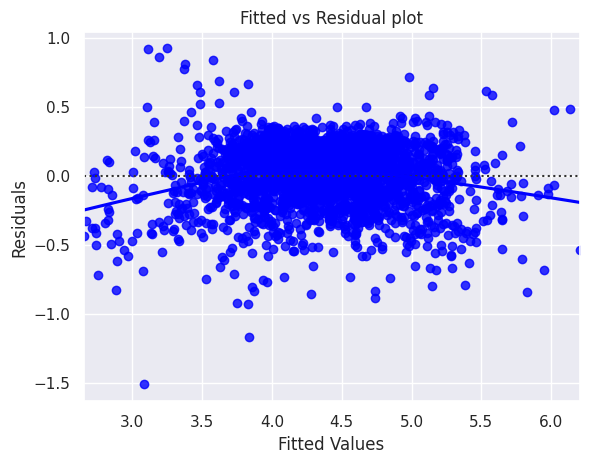

In [77]:
# plot the fitted values versus the residuals
sns.residplot(
    data=df1_pred, x="Fitted Values", y="Residuals", color="blue", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

**Observations:** there is no pattern in the plot. Thus, the assumptions of linearity and independence are satisfied.

### **Test for Normality**
* We need to test for normality by checking the distribution of residuals, by checking the Q-Q plot of residuals, and by using the Shapiro-Wilk test.
* If the residuals follow a normal distribution, they will make a straight line plot, otherwise not.
* If the p-value of the Shapiro-Wilk test is greater than 0.05, we can say the residuals are normally distributed.


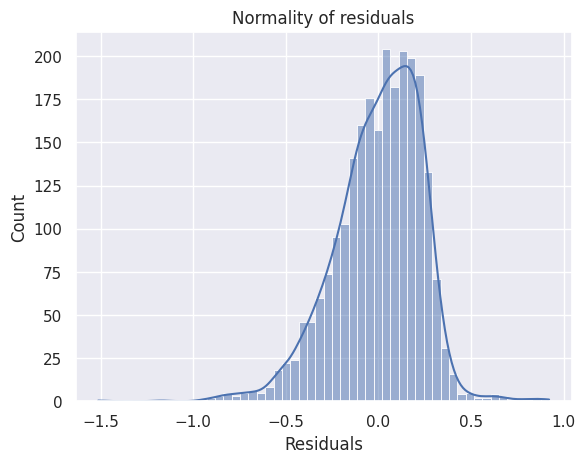

In [78]:
sns.histplot(data=df1_pred, x="Residuals", kde=True)
plt.title("Normality of residuals")
plt.show()

**Observations:** the histogram of residuals has a slight bell shape.

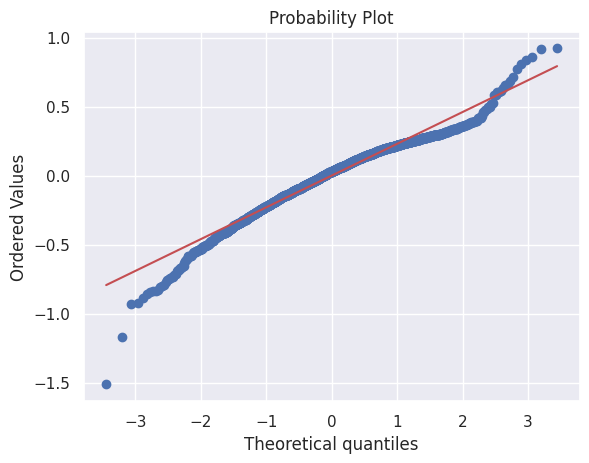

In [79]:
import pylab
import scipy.stats as stats

stats.probplot(df1_pred["Residuals"], dist="norm", plot=pylab)
plt.show()

**Observations:** besides the tails, the residuals follow a straight line.

In [80]:
stats.shapiro(df1_pred["Residuals"])

ShapiroResult(statistic=0.9676972031593323, pvalue=6.995261942370773e-23)

**Observations:**
* Since p-value < 0.05, the residuals are not normal as per the Shapiro-Wilk test.
* Strictly speaking, the residuals are not normal. However, as an approximation, we can accept this distribution as close to being normal.
So, the assumption is satisfied.

###**Test for Homoscedasticity**
* We need to test for homoscedasticty by using the goldfeldquandt test.
* If the p-value is greater than 0.05, we can say that the residuals are homoscedastic. If not, then they are heteroscedastic.

In [81]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df1_pred["Residuals"], x_train3)
lzip(name, test)

[('F statistic', 1.0087504199106758), ('p-value', 0.4401970650667301)]

**Observations:** since p-value > 0.05, the residuals are homoscedastic and so the assumption is satisfied.

All the assumptions of linear regression are satisfied, so now we need to rebuild the final model, check its performance and draw inferences from it.

### **Final Model**

In [82]:
x_train_final = x_train3.copy()
x_test_final = x_test3.copy()

In [83]:
olsmodel_final = sm.OLS(y_train, x_train_final).fit()
print(olsmodel_final.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.839
Model:                               OLS   Adj. R-squared:                  0.838
Method:                    Least Squares   F-statistic:                     895.7
Date:                   Wed, 13 Sep 2023   Prob (F-statistic):               0.00
Time:                           04:09:55   Log-Likelihood:                 80.645
No. Observations:                   2417   AIC:                            -131.3
Df Residuals:                       2402   BIC:                            -44.44
Df Model:                             14                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [84]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel_final_train_perf = model_performance_regression(
    olsmodel_final, x_train_final, y_train
)
olsmodel_final_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.23403,0.182751,0.83924,0.838235,4.395407


In [85]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel_final_test_perf = model_performance_regression(
    olsmodel_final, x_test_final, y_test
)
olsmodel_final_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.241434,0.186649,0.838387,0.836013,4.556349


## **Actionable Insights and Recommendations**

 1. The model explains ~84% of the variation in the data and can predict the normalized used device price within ~4.6%, so it is good for predictive purposes.
 2. The cost of used and refurbished devices are largely based on the cost of new devices. The most significant predictors of the normalized used device price are the normalized price of a new device of the same model, the weight of the devices screen, the resolution of the rear and front cameras, the years since the original release of the device, the amount of RAM, the availability of 4G and 5G network.
   * A unit increase in the normalized new model price will result in a 0.4415 unit increase in the normalized used device price, all other variables held constant.
   * A unit increase in the amount of RAM will result in a 0.0207 unit increase in the normalized used device price, all other variables held constant.
   * A unit increase in the years since the original release of the device will result in a 0.0292 unit decrease in the normalized used device price, all other variables held constant.
   * A unit increase in the resolution of the front camera will result in a 0.0138 unit increase in the normalized used device price, all other variables held constant.
   * A unit increase in the resolution of the rear camera will result in a 0.0210 unit increase in the normalized used device price, all other variables held constant.
   * The normalized used device price for devices with 4G connectivity will be 0.0502 units more than those without 4G connectivity.
 3. Most used and refurbished devices are Android phones, but there are a wide range of companies that provide highly desirable features such as large size, good quality front camera, high RAM, etc. that users would likely purchase.
 4. ReCell should look to attract people who want to sell used phones and tablets which were originally released in recent years and have good front and rear camera resolutions.
 5. Devices with more RAM and 4G connectivity are also good candidates for reselling to certain customer segments.
 6. They should also try to gather and put up phones having a high price for new models to try and increase revenue.
 7. Additional data regarding customer demographics (age, gender, income, etc.) can be collected and analyzed to gain better insights into the preferences of customers across different price segments.
 8. ReCell can also look to sell other used gadgets, like smart watches, which might attract certain segments of customers.